# Drug Persistency and Medical Adherence
Team Name: Feature Transformers
Team members:

- Name: Wangu Ndungu
- Email: nwangu349@gmail.com
- Country: Kenya
- College/Company: Kenyatta University
- Specialization: Data Science



## PROBLEM STATEMENT
According to the World Health Organisation, only 50-70% of patients adhere properly to prescribed drugs during therapy. This is especially true among those with long term medication.
This worrying statistic is caused by various factors, for example: patient’s condition or disease,
their socio-economic status, confusion by the schedule, forgetting, discontinuing because they
feel better, just to name a few. Medical non-adherence can lead to devastating consequences
on one’s health, especially those with chronic illnesses.
The purpose of this project is to study trends among patients in a sample and build a model
that’ll classify a new patient as Persistent or Non-Persistent.
This project will givemedical practitioners(especially pharmaceuticals) insight on which patients might require more rigorous follow-ups to ensure they will adhere to their prescriptions.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
%matplotlib inline

### Importing the data

In [2]:
df = pd.read_excel('C:/Users/user/Drug percistency/Healthcare_dataset.xlsx', sheet_name='Dataset')
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


### Data attributes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

This dataset has a total of 68 variables, Percistency_Flag being our target variable. 67 of these attributes are categorical and 2 of the are continuous.

### Checking for missing data

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Ptid
False    3424
Name: Ptid, dtype: int64

Persistency_Flag
False    3424
Name: Persistency_Flag, dtype: int64

Gender
False    3424
Name: Gender, dtype: int64

Race
False    3424
Name: Race, dtype: int64

Ethnicity
False    3424
Name: Ethnicity, dtype: int64

Region
False    3424
Name: Region, dtype: int64

Age_Bucket
False    3424
Name: Age_Bucket, dtype: int64

Ntm_Speciality
False    3424
Name: Ntm_Speciality, dtype: int64

Ntm_Specialist_Flag
False    3424
Name: Ntm_Specialist_Flag, dtype: int64

Ntm_Speciality_Bucket
False    3424
Name: Ntm_Speciality_Bucket, dtype: int64

Gluco_Record_Prior_Ntm
False    3424
Name: Gluco_Record_Prior_Ntm, dtype: int64

Gluco_Record_During_Rx
False    3424
Name: Gluco_Record_During_Rx, dtype: int64

Dexa_Freq_During_Rx
False    3424
Name: Dexa_Freq_During_Rx, dtype: int64

Dexa_During_Rx
False    3424
Name: Dexa_During_Rx, dtype: int64

Frag_Frac_Prior_Ntm
False    3424
Name: Frag_Frac_Prior_Ntm, dtype: int64

Frag_Frac_During_Rx
False    3424
N

There is no missing data in the dataset

### Checking for Outliers
##### Numerical values

Lets visualize the column 'Dexa_Freq_During_Rx' with a box plot

<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

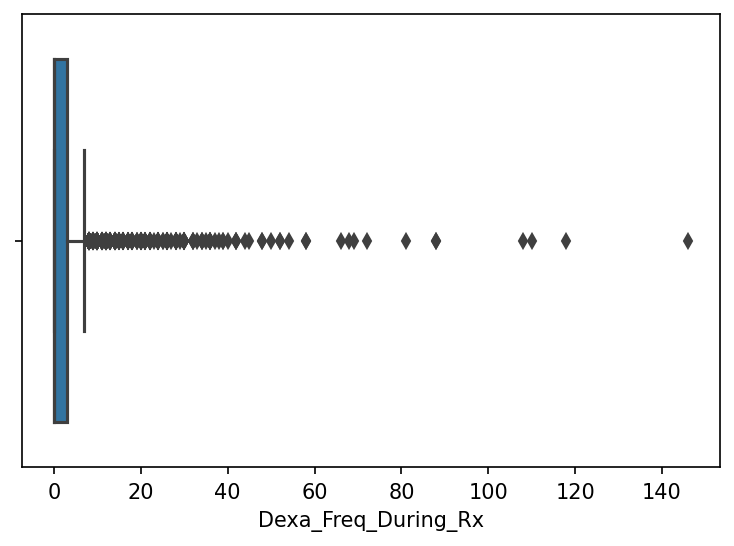

In [6]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df['Dexa_Freq_During_Rx'])

We can see there's a couple of outliers between 10 and 150

<AxesSubplot:xlabel='Dexa_Freq_During_Rx', ylabel='Density'>

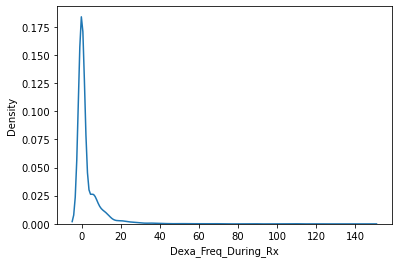

In [7]:
sns.kdeplot(x=df["Dexa_Freq_During_Rx"])

The data is heavily positively skewed. We shall use the .skew() function to find out the exact extent.

In [8]:
print(skew(df['Dexa_Freq_During_Rx']))

6.805747051718919


We shall apply log transformation to deal with this and replace the column with the log-transformmed version

In [9]:
df["Dexa_Freq_During_Rx_Log"] = df['Dexa_Freq_During_Rx'].apply(lambda x: np.log(1+x))

Let's compare these two columns' kde plots side by side

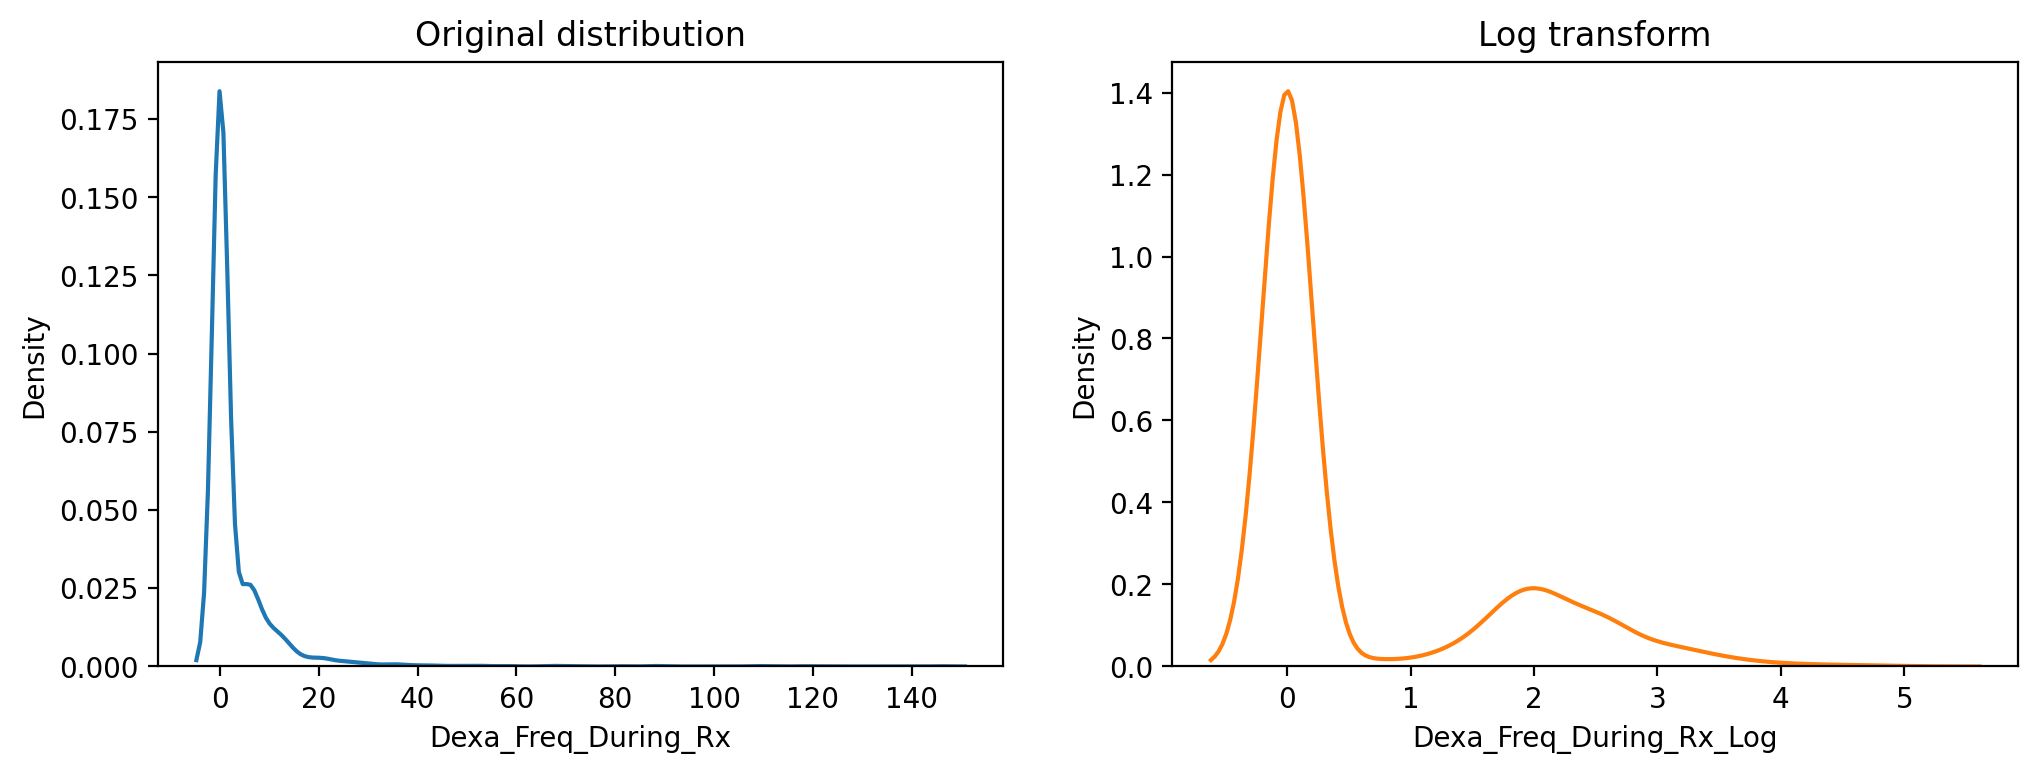

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((12,4))
fig.set_dpi(200)
sns.kdeplot(x=df["Dexa_Freq_During_Rx"],ax=axes[0],color="tab:blue")
sns.kdeplot(x=df["Dexa_Freq_During_Rx_Log"],color="tab:orange");
axes[0].set_title("Original distribution")
axes[1].set_title("Log transform");

<AxesSubplot:xlabel='Dexa_Freq_During_Rx_Log'>

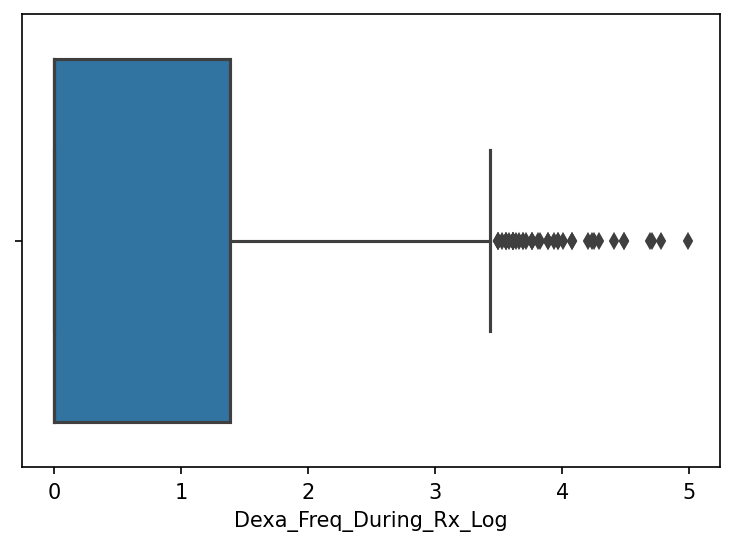

In [11]:
#Box plot for the log transform data
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(x=df['Dexa_Freq_During_Rx_Log'])

In [12]:
print(skew(df['Dexa_Freq_During_Rx_Log']))


1.4052436284675567


The skewness has been greatly improved using log transformation

In [13]:
print(skew(df['Count_Of_Risks']))


0.8794050541279611


A posite skewness is being observed. Lets visualize this column

<AxesSubplot:xlabel='Count_Of_Risks'>

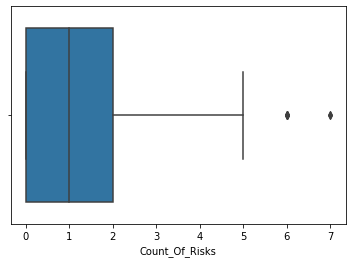

In [14]:
sns.boxplot(x=df['Count_Of_Risks'])

Let's try replacing our outliers with the median

In [15]:
median = df.loc[df['Count_Of_Risks'] <5, 'Count_Of_Risks'].median()
df.loc[df.Count_Of_Risks > 5, 'Count_Of_Risks'] = np.nan
df.fillna(median,inplace=True)
print(skew(df['Count_Of_Risks']))


0.7359181096502345


skewness has been reduce a little by replacing the outlier values with the median

#### Categorical values

We will detect outliers by finding categories that have low frequencies with the help of histograms

In [16]:
#Create a list of categorical columns
cat_cols=df.select_dtypes("object").drop("Ptid",axis=1).columns
#Create a list of categorical columns with outliers
cat_cols_outliers = cat_cols[[any(df[col].value_counts()<=10) for col in cat_cols]] 

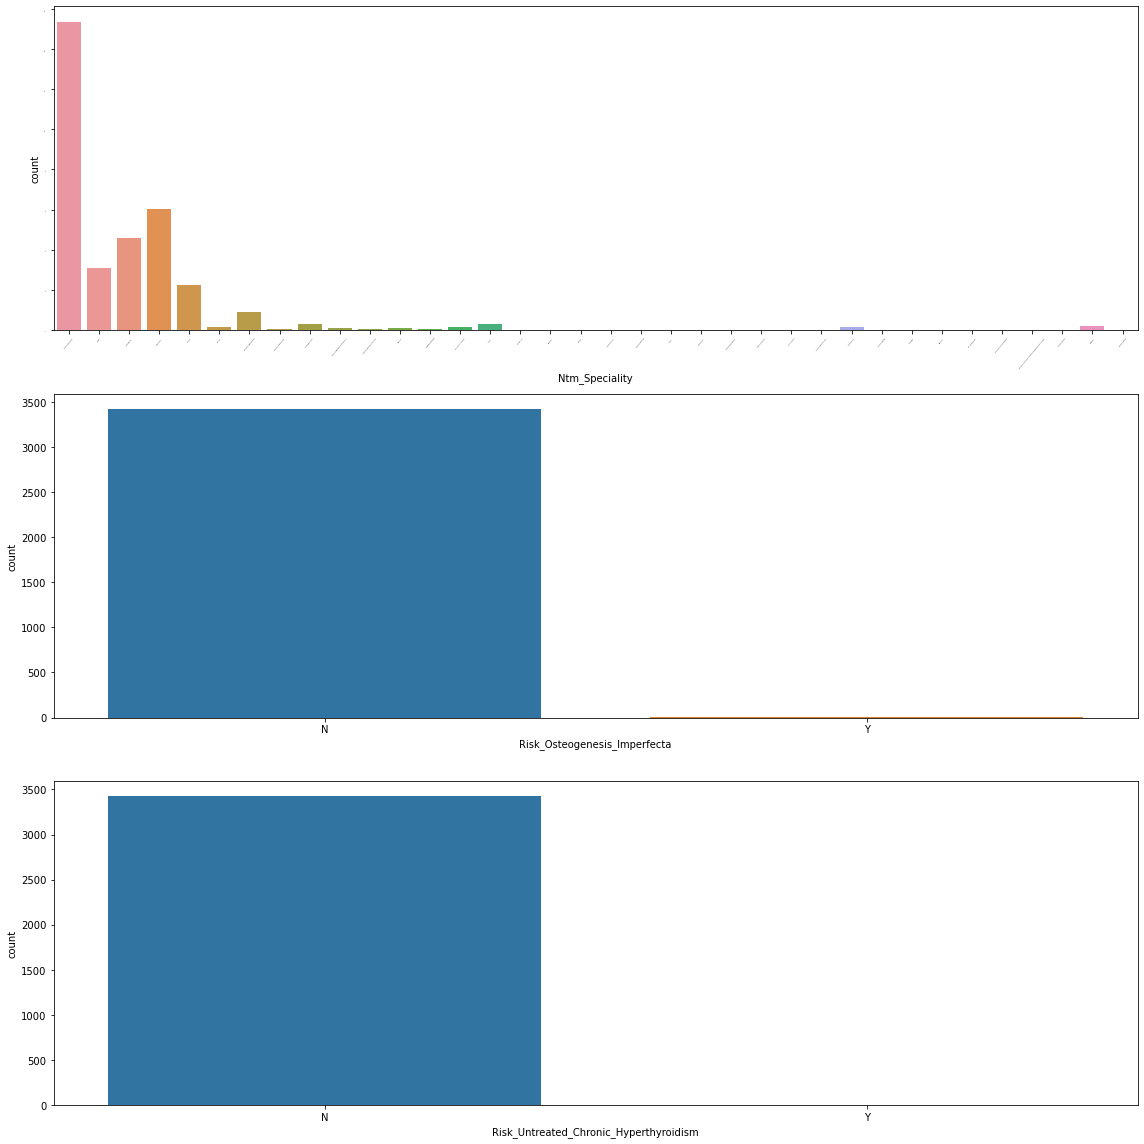

In [17]:
#Visualize the imbalance of categorical columns with outliers
fig,axes=plt.subplots(nrows=len(cat_cols_outliers))
fig.set_size_inches((16,4*4))
i=0
for col in cat_cols_outliers:
    sns.countplot(x=df[col],ax=axes[i])
    i+=1
axes[0].tick_params(rotation=50,labelsize=0)
plt.tight_layout()

Now let's retain these categogories and see how it'll affect the model

## Feature scaling and transformation

### Numerical values

We Have already scaled our 'Dexa_Freq_During_Rx_Log' using log Transformation in order to reduce outliers and minimize skewness.
For the attribute "Count_Of_Risks", we will categorize our values in the following bins: Low Risk, Medium Risk and High Risk

<AxesSubplot:xlabel='Count_Of_Risks_Binned', ylabel='Count'>

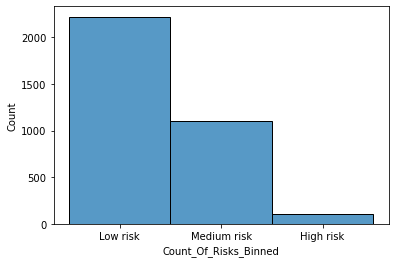

In [18]:
Risk_Bins = np.linspace(min(df['Count_Of_Risks']), max(df['Count_Of_Risks']), 4)
group_names = ["Low risk", "Medium risk", "High risk"]
df['Count_Of_Risks_Binned'] = pd.cut(df['Count_Of_Risks'], Risk_Bins, labels = group_names, include_lowest = True)
sns.histplot(x=df['Count_Of_Risks_Binned'])

### Categorical values
We have both nominal and ordinal data in our dataset. We will be using ordinal encoding on our ordinal data and frequency encoding on our noiminal data.

In [19]:
print(cat_cols)

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_D

After going through the dataset, I have found the following ordinal columns:
- 'Age_Bucket'
- 'Tscore_Bucket_Prior_Ntm'
- 'Tscore_Bucket_During_Rx'

In [20]:
# Importing ordinal encoder
data_categorical = df[cat_cols]
from sklearn.preprocessing import OrdinalEncoder
Age_column = data_categorical[["Age_Bucket"]]
encoder = OrdinalEncoder()
Age_encoded = encoder.fit_transform(Age_column)
Age_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [3.],
       [0.],
       [1.]])

In [21]:
Tscore_Bucket_Prior_Ntm_column = data_categorical[["Tscore_Bucket_Prior_Ntm"]]
encoder = OrdinalEncoder()
Tscore_Bucket_Prior_Ntm_encoded = encoder.fit_transform(Tscore_Bucket_Prior_Ntm_column)
Tscore_Bucket_Prior_Ntm_encoded

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [68]:
Persistency_column = data_categorical[["Persistency_Flag"]]
encoder = OrdinalEncoder()
Persistency_Flag_encoded = encoder.fit_transform(Persistency_column)
Persistency_Flag_encoded

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [22]:
Tscore_Bucket_During_Rx_column = data_categorical[["Tscore_Bucket_During_Rx"]]
encoder = OrdinalEncoder()
Tscore_Bucket_During_Rx_encoded = encoder.fit_transform(Tscore_Bucket_During_Rx_column)
Tscore_Bucket_During_Rx_encoded

array([[0.],
       [2.],
       [0.],
       ...,
       [0.],
       [2.],
       [2.]])

In [69]:
df["Age_encoded"] = Age_encoded
df["Tscore_Bucket_Prior_Ntm_encoded"] = Tscore_Bucket_Prior_Ntm_encoded
df["Tscore_Bucket_During_Rx_encoded"] = Tscore_Bucket_During_Rx_encoded
df["Persistency_Flag_encoded"] = Persistency_Flag_encoded

Now for the Nominal colums

In [70]:
df_nominal = data_categorical.drop(["Tscore_Bucket_During_Rx", "Tscore_Bucket_Prior_Ntm", "Age_Bucket", "Persistency_Flag"], axis = 1)

In [71]:
# Using frequency encoding
for column in df_nominal:
    Freq_enc = (df_nominal.groupby(column).size()) / len(df)
    print(Freq_enc)
    df[column + 'freq_enc'] = df_nominal[column].apply(lambda x : Freq_enc[x])

Gender
Female    0.943341
Male      0.056659
dtype: float64
Race
African American    0.027745
Asian               0.024533
Caucasian           0.919393
Other/Unknown       0.028329
dtype: float64
Ethnicity
Hispanic        0.028621
Not Hispanic    0.944801
Unknown         0.026577
dtype: float64
Region
Midwest          0.403914
Northeast        0.067757
Other/Unknown    0.017523
South            0.364194
West             0.146612
dtype: float64
Ntm_Speciality
CARDIOLOGY                                                        0.006425
CLINICAL NURSE SPECIALIST                                         0.000292
EMERGENCY MEDICINE                                                0.000292
ENDOCRINOLOGY                                                     0.133762
GASTROENTEROLOGY                                                  0.000584
GENERAL PRACTITIONER                                              0.448306
GERIATRIC MEDICINE                                                0.000584
HEMATOLOGY &

In [26]:
# dropping dulicate rows 
df = df.drop_duplicates()

In [27]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Diseasefreq_enc,Risk_Family_History_Of_Osteoporosisfreq_enc,Risk_Low_Calcium_Intakefreq_enc,Risk_Vitamin_D_Insufficiencyfreq_enc,Risk_Poor_Health_Frailtyfreq_enc,Risk_Excessive_Thinnessfreq_enc,Risk_Hysterectomy_Oophorectomyfreq_enc,Risk_Estrogen_Deficiencyfreq_enc,Risk_Immobilizationfreq_enc,Risk_Recurring_Fallsfreq_enc
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0.994743,0.895444,0.012266,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848


## Exploratory data Analysis
Let's take a deep dive into our dataframe and try to formulate a few hypotheses that we will be testing using exploratory data analysis.
- Patients mapped to IDNs belong to a particular race or ethnicity
- Patients mapped to IDNs get more dexa scans
- Patients of a certain age group have lower T-scores prior to any prescriptions
- A certain group of patients are more prone to fragility fractures
- Drug persistency have an effect on a patients T-score
- Patients on concomitant drugs have a lower rate of drug percistency
- Patients with Cormobiditant illness have lower bone density and lower rates of drugs persistency
- Patients with injectable drugs have a lower rate of drug persistency


### Patients' analysis
#### Background information

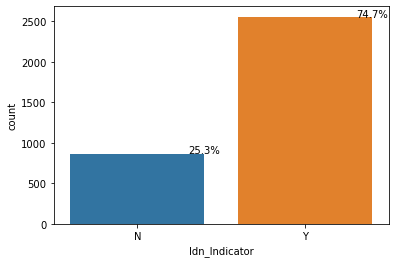

In [28]:
total = float(len(df))
ax = sns.countplot(x= 'Idn_Indicator', data = df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

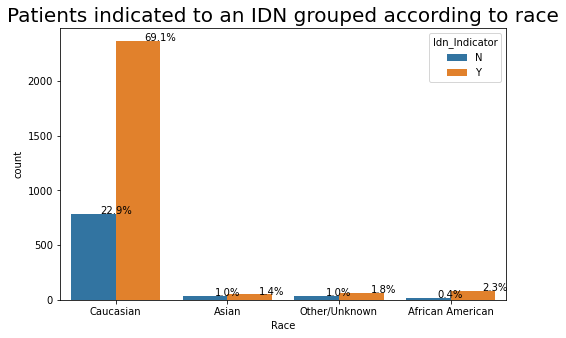

In [29]:
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Race", hue="Idn_Indicator", data=df)
plt.title('Patients indicated to an IDN grouped according to race', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


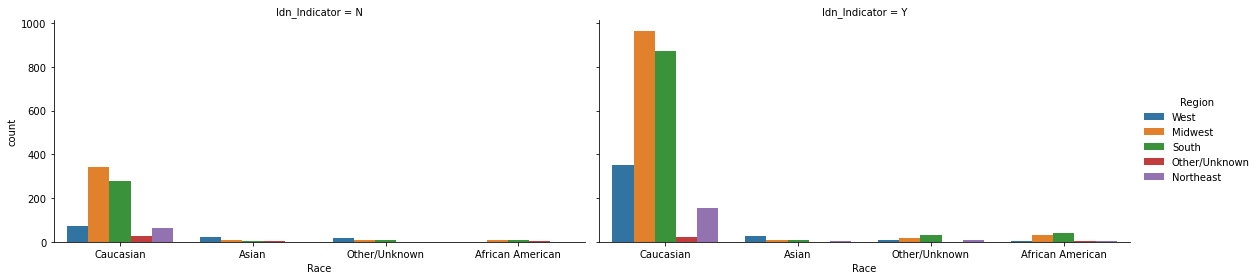

In [30]:

sns.catplot(x="Race", hue="Region", col="Idn_Indicator",
                data=df, kind="count",
                height=4, aspect=2);

##### Findings
- 75% of the patients belong to IDNs. This may be influenced by the fact that with IDNs, one gets a full range of quality(and sometimes more affordable) healthcare without having to visit other facilities
- More patients are mapped to IDNs across each race, with caucasian patients being the vast majority of study subjects within our dataset
- Majority of patients mapped to IDNs belonging to the West, Midwest and South regions. This may be attributed by most of our patients coming from these regions

#### Who gets more Dexa scans?

<AxesSubplot:title={'center':'No. of Dexa scans adminstered during presciption grouped by IDN indicator '}, xlabel='Dexa_Freq_During_Rx', ylabel='count'>

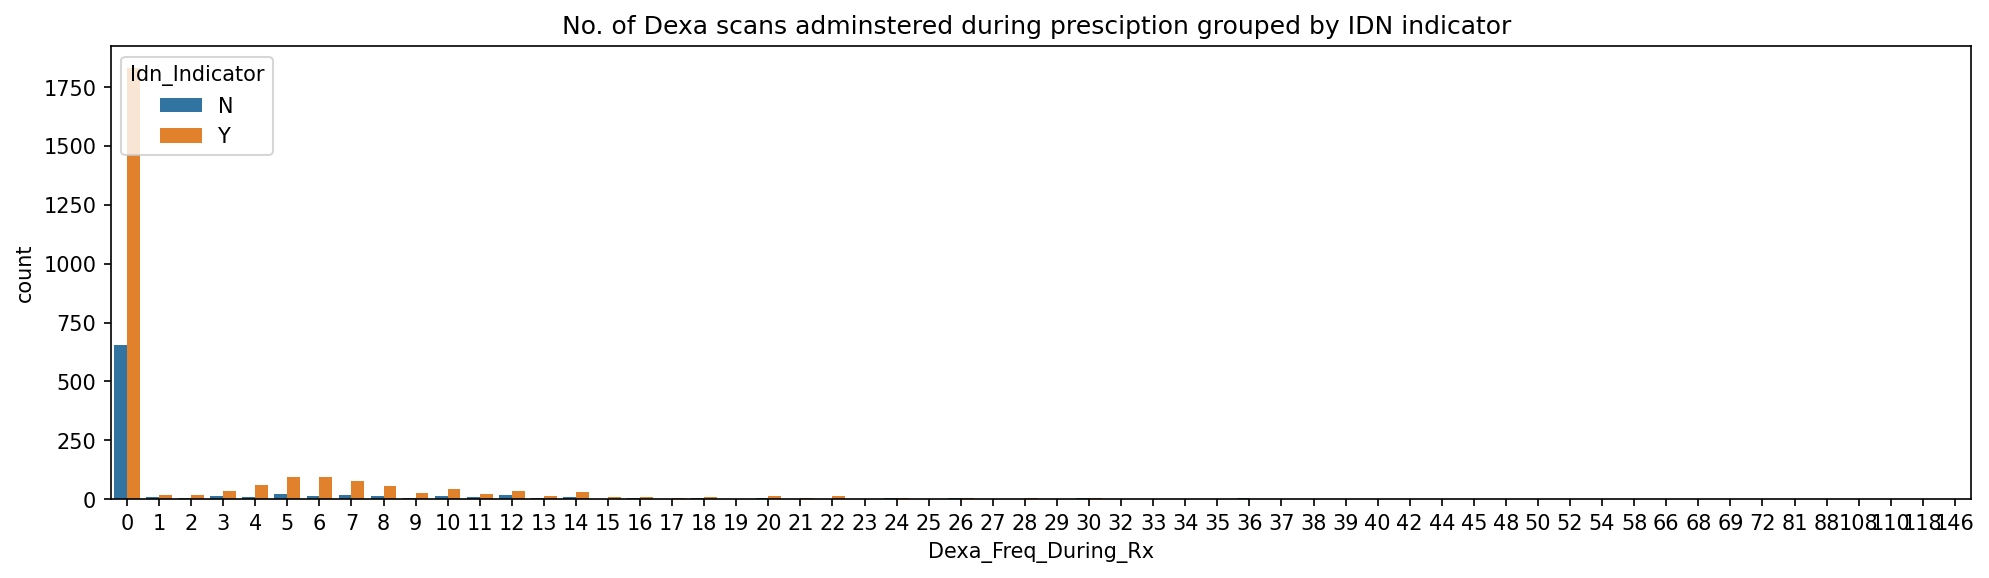

In [31]:
plt.figure(figsize=(16,4),dpi=150)
plt.title('No. of Dexa scans adminstered during presciption grouped by IDN indicator ')
sns.countplot(x= 'Dexa_Freq_During_Rx', hue = 'Idn_Indicator',  data = df )

<AxesSubplot:title={'center':'Dexa scan frequency according to age and race'}, xlabel='Age_Bucket', ylabel='Dexa_Freq_During_Rx'>

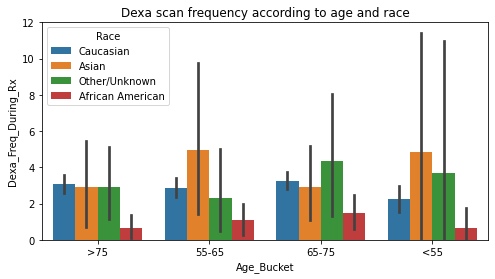

In [32]:
plt.figure(figsize=(8,4))
plt.title('Dexa scan frequency according to age and race')
sns.barplot(x = 'Age_Bucket', y= 'Dexa_Freq_During_Rx', hue= 'Race', data = df)

<AxesSubplot:xlabel='Age_Bucket', ylabel='count'>

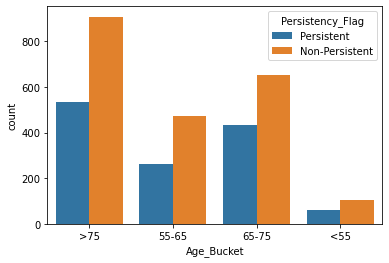

In [33]:
sns.countplot(x="Age_Bucket", hue="Persistency_Flag", data=df)

#### Findings
- Most patients did not have Dexa scans admistered to them during their prescriptions
- Those that did get dexa scans vastly got them from IDNs
- Older patients are more likely to be non-persistent with their medication

#### Fragility fractures

At what age do most fragility fractures occur?

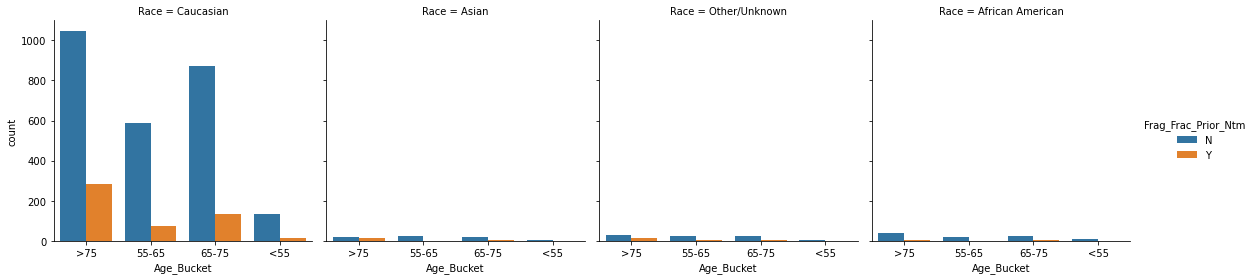

In [34]:
sns.catplot(x="Age_Bucket", hue="Frag_Frac_Prior_Ntm", col="Race",
                data=df, kind="count",
                height=4, aspect=1);

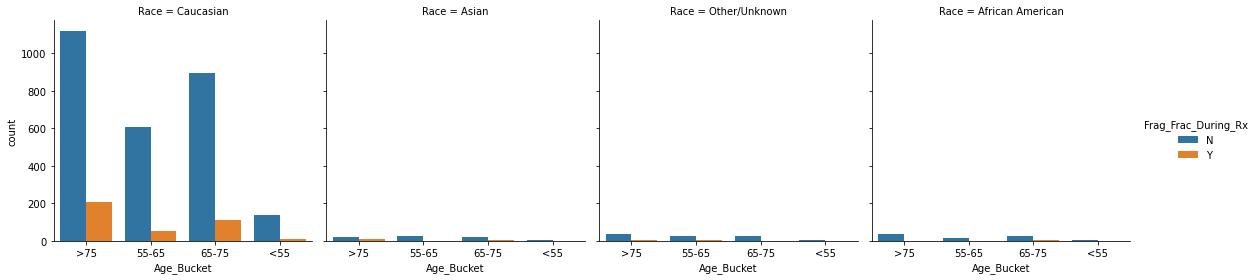

In [35]:
sns.catplot(x="Age_Bucket", hue="Frag_Frac_During_Rx", col="Race",
                data=df, kind="count",
                height=4, aspect=1);

Is a patients T-score directly related to whether or not they are at risk of getting fragility fractures?

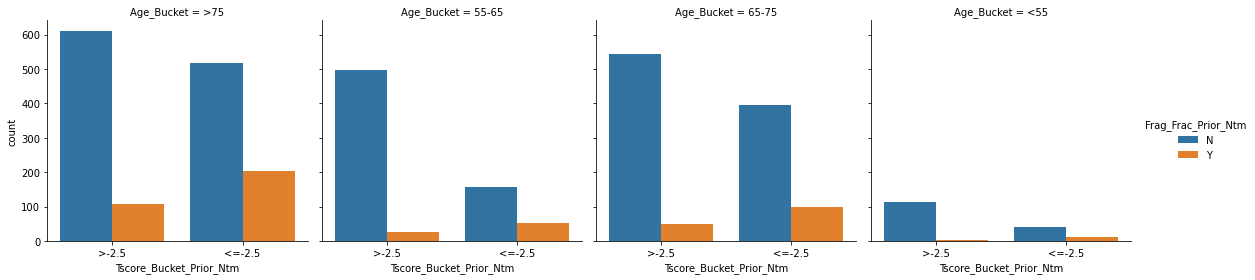

In [36]:
sns.catplot(x="Tscore_Bucket_Prior_Ntm", hue="Frag_Frac_Prior_Ntm", col="Age_Bucket",
                data=df, kind="count",
                height=4, aspect=1);

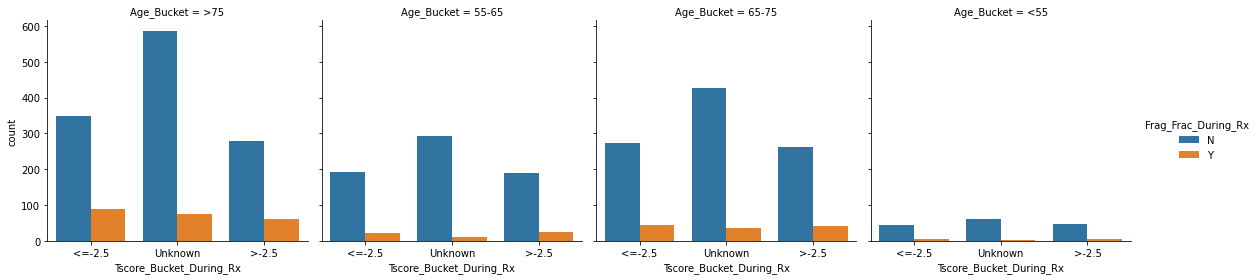

In [37]:
sns.catplot(x="Tscore_Bucket_During_Rx", hue="Frag_Frac_During_Rx", col="Age_Bucket",
                data=df, kind="count",
                height=4, aspect=1);

##### Patients with cormobid conditions
Cormobidity is the presence of two or more medical conditions. Prescription of various kinds of treatments is required for these patients. Are these patiemts more likely to be non-persistent with their medication? Does Cormobidity have an effect on a patient's T-score?

In [38]:
# creating a dataframe with the columns we want to use
PatientInfo = df[["Age_encoded", "Persistency_Flagfreq_enc", "Tscore_Bucket_Prior_Ntm_encoded"]]
Cormobid = df.iloc[:, 94:108]
PatientCormobidity = [PatientInfo, Cormobid]
Cormobid_df = pd.concat(PatientCormobidity, axis=1, join="inner")
Cormobid_df.head(5)

,Age_encoded,Persistency_Flagfreq_enc,Tscore_Bucket_Prior_Ntm_encoded,Comorb_Encounter_For_Screening_For_Malignant_Neoplasmsfreq_enc,Comorb_Encounter_For_Immunizationfreq_enc,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dxfreq_enc",Comorb_Vitamin_D_Deficiencyfreq_enc,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classifiedfreq_enc,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dxfreq_enc,Comorb_Long_Term_Current_Drug_Therapyfreq_enc,Comorb_Dorsalgiafreq_enc,Comorb_Personal_History_Of_Other_Diseases_And_Conditionsfreq_enc,Comorb_Other_Disorders_Of_Bone_Density_And_Structurefreq_enc,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemiasfreq_enc,Comorb_Osteoporosis_without_current_pathological_fracturefreq_enc,Comorb_Personal_history_of_malignant_neoplasmfreq_enc,Comorb_Gastro_esophageal_reflux_diseasefreq_enc
0,3.0,0.37646,1.0,0.552278,0.441881,0.39486,0.680783,0.708236,0.231016,0.76139,0.227512,0.197722,0.848715,0.484521,0.732185,0.810456,0.816005
1,0.0,0.62354,1.0,0.552278,0.558119,0.39486,0.680783,0.708236,0.768984,0.76139,0.772488,0.802278,0.848715,0.484521,0.732185,0.810456,0.816005
2,1.0,0.62354,0.0,0.447722,0.558119,0.39486,0.680783,0.708236,0.768984,0.76139,0.772488,0.802278,0.848715,0.484521,0.732185,0.810456,0.816005
3,3.0,0.62354,1.0,0.552278,0.441881,0.39486,0.680783,0.291764,0.768984,0.76139,0.227512,0.802278,0.848715,0.515479,0.732185,0.810456,0.183995
4,3.0,0.62354,0.0,0.447722,0.441881,0.39486,0.680783,0.708236,0.768984,0.76139,0.227512,0.197722,0.848715,0.484521,0.732185,0.810456,0.816005


In [39]:
Cormobid_df.corr()

,Age_encoded,Persistency_Flagfreq_enc,Tscore_Bucket_Prior_Ntm_encoded,Comorb_Encounter_For_Screening_For_Malignant_Neoplasmsfreq_enc,Comorb_Encounter_For_Immunizationfreq_enc,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dxfreq_enc",Comorb_Vitamin_D_Deficiencyfreq_enc,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classifiedfreq_enc,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dxfreq_enc,Comorb_Long_Term_Current_Drug_Therapyfreq_enc,Comorb_Dorsalgiafreq_enc,Comorb_Personal_History_Of_Other_Diseases_And_Conditionsfreq_enc,Comorb_Other_Disorders_Of_Bone_Density_And_Structurefreq_enc,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemiasfreq_enc,Comorb_Osteoporosis_without_current_pathological_fracturefreq_enc,Comorb_Personal_history_of_malignant_neoplasmfreq_enc,Comorb_Gastro_esophageal_reflux_diseasefreq_enc
Age_encoded,1.000000,0.001976,-0.139659,0.153437,-0.074153,0.031601,0.019368,-0.013027,0.118082,-0.036832,-0.061233,-0.029494,0.055870,0.132569,0.042129,-0.025022,-0.051770
Persistency_Flagfreq_enc,0.001976,1.000000,-0.018903,0.322320,0.314887,0.289828,0.172664,0.233279,0.213413,0.352760,0.215307,0.219665,0.247283,-0.163495,0.139920,0.174835,0.220644
Tscore_Bucket_Prior_Ntm_encoded,-0.139659,-0.018903,1.000000,-0.049224,0.017948,-0.018860,0.045292,0.013277,-0.029792,-0.029717,0.047666,0.044071,-0.202228,-0.006727,-0.168502,-0.057491,-0.006128
Comorb_Encounter_For_Screening_For_Malignant_Neoplasmsfreq_enc,0.153437,0.322320,-0.049224,1.000000,0.227780,0.295191,0.072620,0.136603,0.279885,0.146354,0.137612,0.147308,0.144372,-0.158386,0.092100,0.113031,0.151479
Comorb_Encounter_For_Immunizationfreq_enc,-0.074153,0.314887,0.017948,0.227780,1.000000,0.348389,0.100954,0.196080,0.144376,0.202801,0.175037,0.150386,0.141320,-0.235447,0.092693,0.111365,0.161815
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dxfreq_enc",0.031601,0.289828,-0.018860,0.295191,0.348389,1.000000,0.050520,0.113738,0.205070,0.112700,0.127417,0.139031,0.129161,-0.208106,0.071393,0.127646,0.126806
Comorb_Vitamin_D_Deficiencyfreq_enc,0.019368,0.172664,0.045292,0.072620,0.100954,0.050520,1.000000,0.113153,0.045334,0.116411,0.070730,0.086342,0.027354,-0.148653,0.040007,0.012513,0.062884
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classifiedfreq_enc,-0.013027,0.233279,0.013277,0.136603,0.196080,0.113738,0.113153,1.000000,0.128372,0.196903,0.273890,0.155629,0.096583,-0.110607,0.142843,0.096133,0.154516
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dxfreq_enc,0.118082,0.213413,-0.029792,0.279885,0.144376,0.205070,0.045334,0.128372,1.000000,0.135355,0.107500,0.168067,0.122473,-0.089092,0.086311,0.107968,0.106331
Comorb_Long_Term_Current_Drug_Therapyfreq_enc,-0.036832,0.352760,-0.029717,0.146354,0.202801,0.112700,0.116411,0.196903,0.135355,1.000000,0.204507,0.236488,0.214935,-0.138277,0.155037,0.173323,0.236386


Let's create a heatmap that'll better visualize correlation between our intended variable in a manner that is more easy on the eye

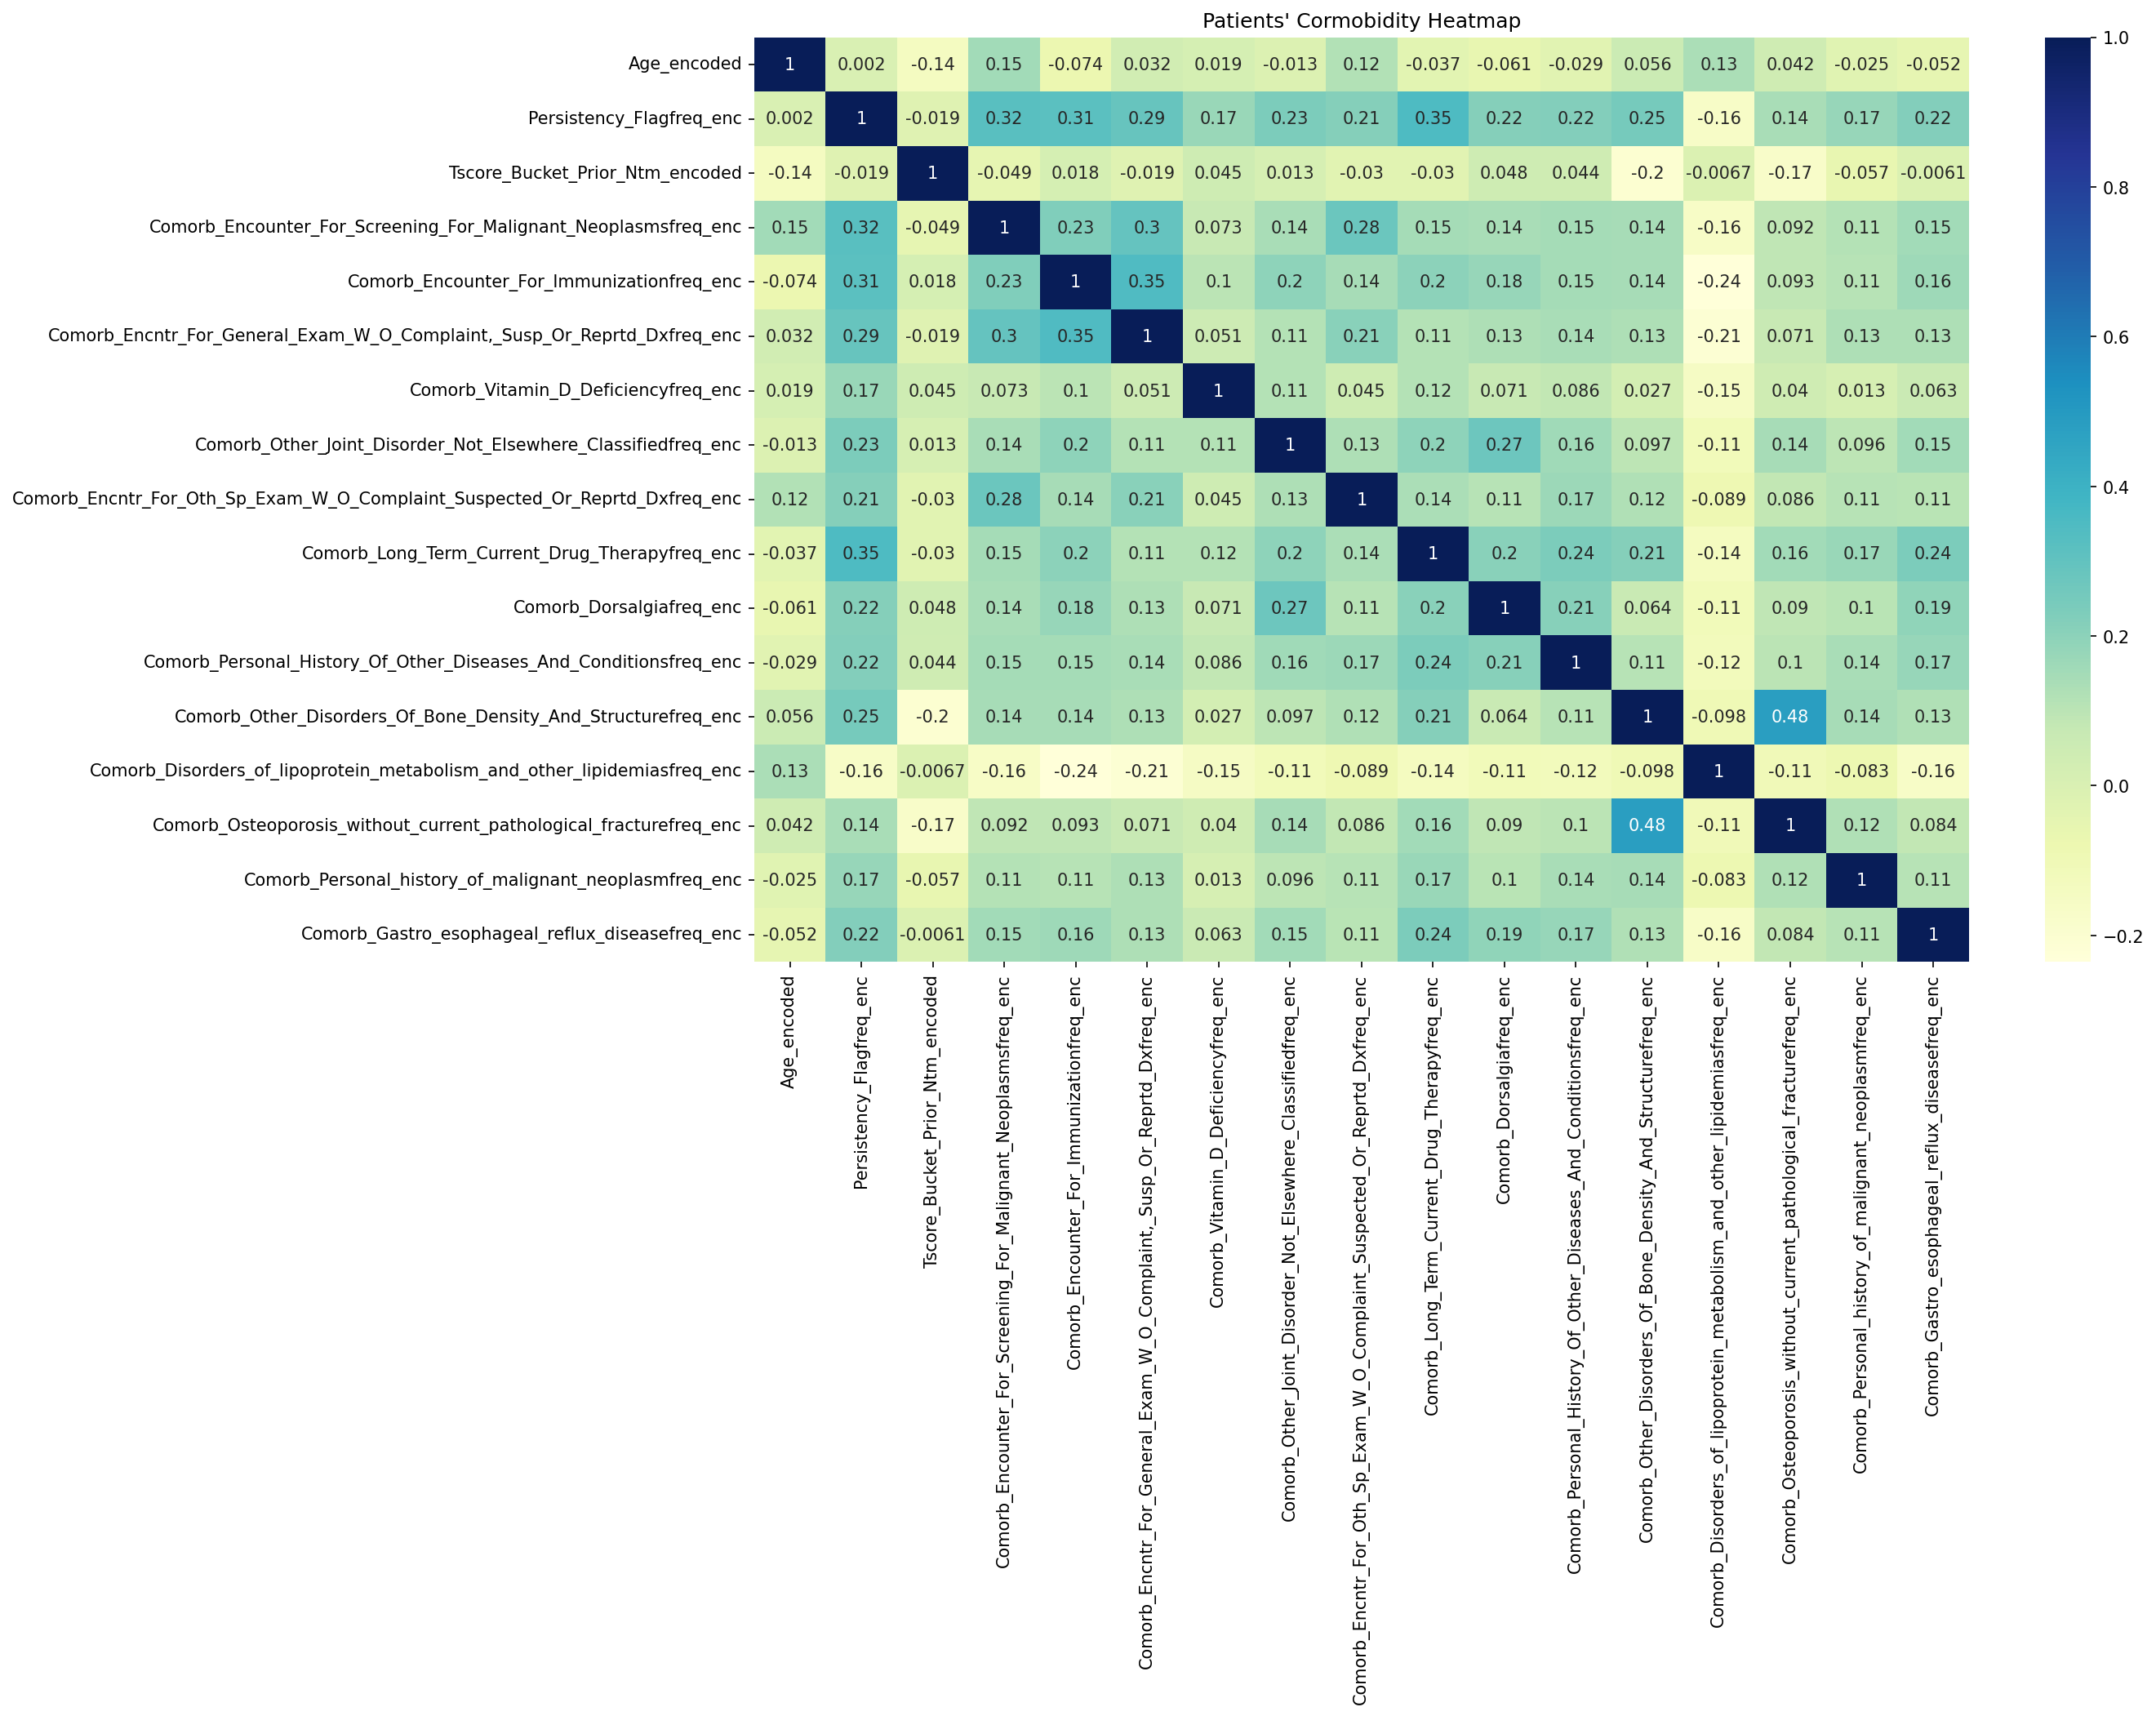

In [40]:
plt.figure(figsize=(16,10),dpi=150)
plt.title("Patients' Cormobidity Heatmap")
dataplot1 = sns.heatmap(Cormobid_df.corr(), cmap="YlGnBu", annot=True)
  

#### Findings
- The Risk of a patient getting a fragility fracture increases with age 
- Patients above 75 years of age are the most vulnerable to fragility fractures
- Patients with lower T-scores get more fragility fractures, this is probably attributed by their lower bone density
- Patients above 75 years of age with lower T-scores is our most vulnarable group
- There is some correlation between a patient's persistency flag and cormobidity with current long term therapy and cormobid encounters for screening for malignant neoplasms 
- There is high correlation between Comorbidity of  Osteoporosis without current pathological fracture and cormobidity with other disoders of bone density and structures. A patient diagnosed with osteoporsis is likely to have other disorders of bone density and stucture.

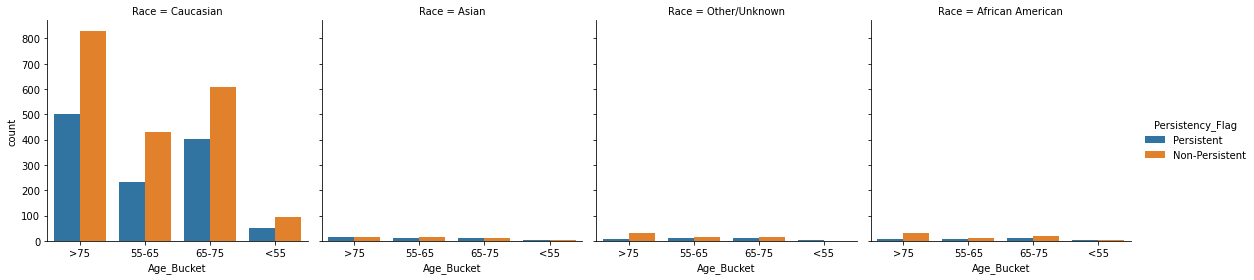

In [41]:
sns.catplot(x="Age_Bucket", hue="Persistency_Flag", col="Race",
                data=df, kind="count",
                height=4, aspect=1);

From the above plot, it is difficult to tell which group is more likely to be non-persistent due to the dataset having a majority of caucasian people to begin with

### Administered drugs
Here we shall be investigating whether the types of drugs adminstered have any effect on the patients' persistency
#### Drug Concormity
This is the prescription of two or more drugs give at the same time or almost the same time to a patient. Let's see if this has any effect on a patient's persitency

In [42]:
# creating a dataframe with the specific columns we would like to use
PatientInfo = df[["Age_encoded", "Persistency_Flagfreq_enc", "Tscore_Bucket_Prior_Ntm_encoded"]]
Concorm = df.iloc[:, 108:118]
PatientConcormity = [PatientInfo, Concorm]
Concorm_df = pd.concat(PatientConcormity, axis=1, join="inner")
Concorm_df.head(5)

,Age_encoded,Persistency_Flagfreq_enc,Tscore_Bucket_Prior_Ntm_encoded,Concom_Cholesterol_And_Triglyceride_Regulating_Preparationsfreq_enc,Concom_Narcoticsfreq_enc,Concom_Systemic_Corticosteroids_Plainfreq_enc,Concom_Anti_Depressants_And_Mood_Stabilisersfreq_enc,Concom_Fluoroquinolonesfreq_enc,Concom_Cephalosporinsfreq_enc,Concom_Macrolides_And_Similar_Typesfreq_enc,Concom_Broad_Spectrum_Penicillinsfreq_enc,Concom_Anaesthetics_Generalfreq_enc,Concom_Viral_Vaccinesfreq_enc
0,3.0,0.37646,1.0,0.65479,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904
1,0.0,0.62354,1.0,0.65479,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904
2,1.0,0.62354,0.0,0.34521,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904
3,3.0,0.62354,1.0,0.65479,0.360105,0.284171,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.103096
4,3.0,0.62354,0.0,0.65479,0.360105,0.284171,0.280082,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904


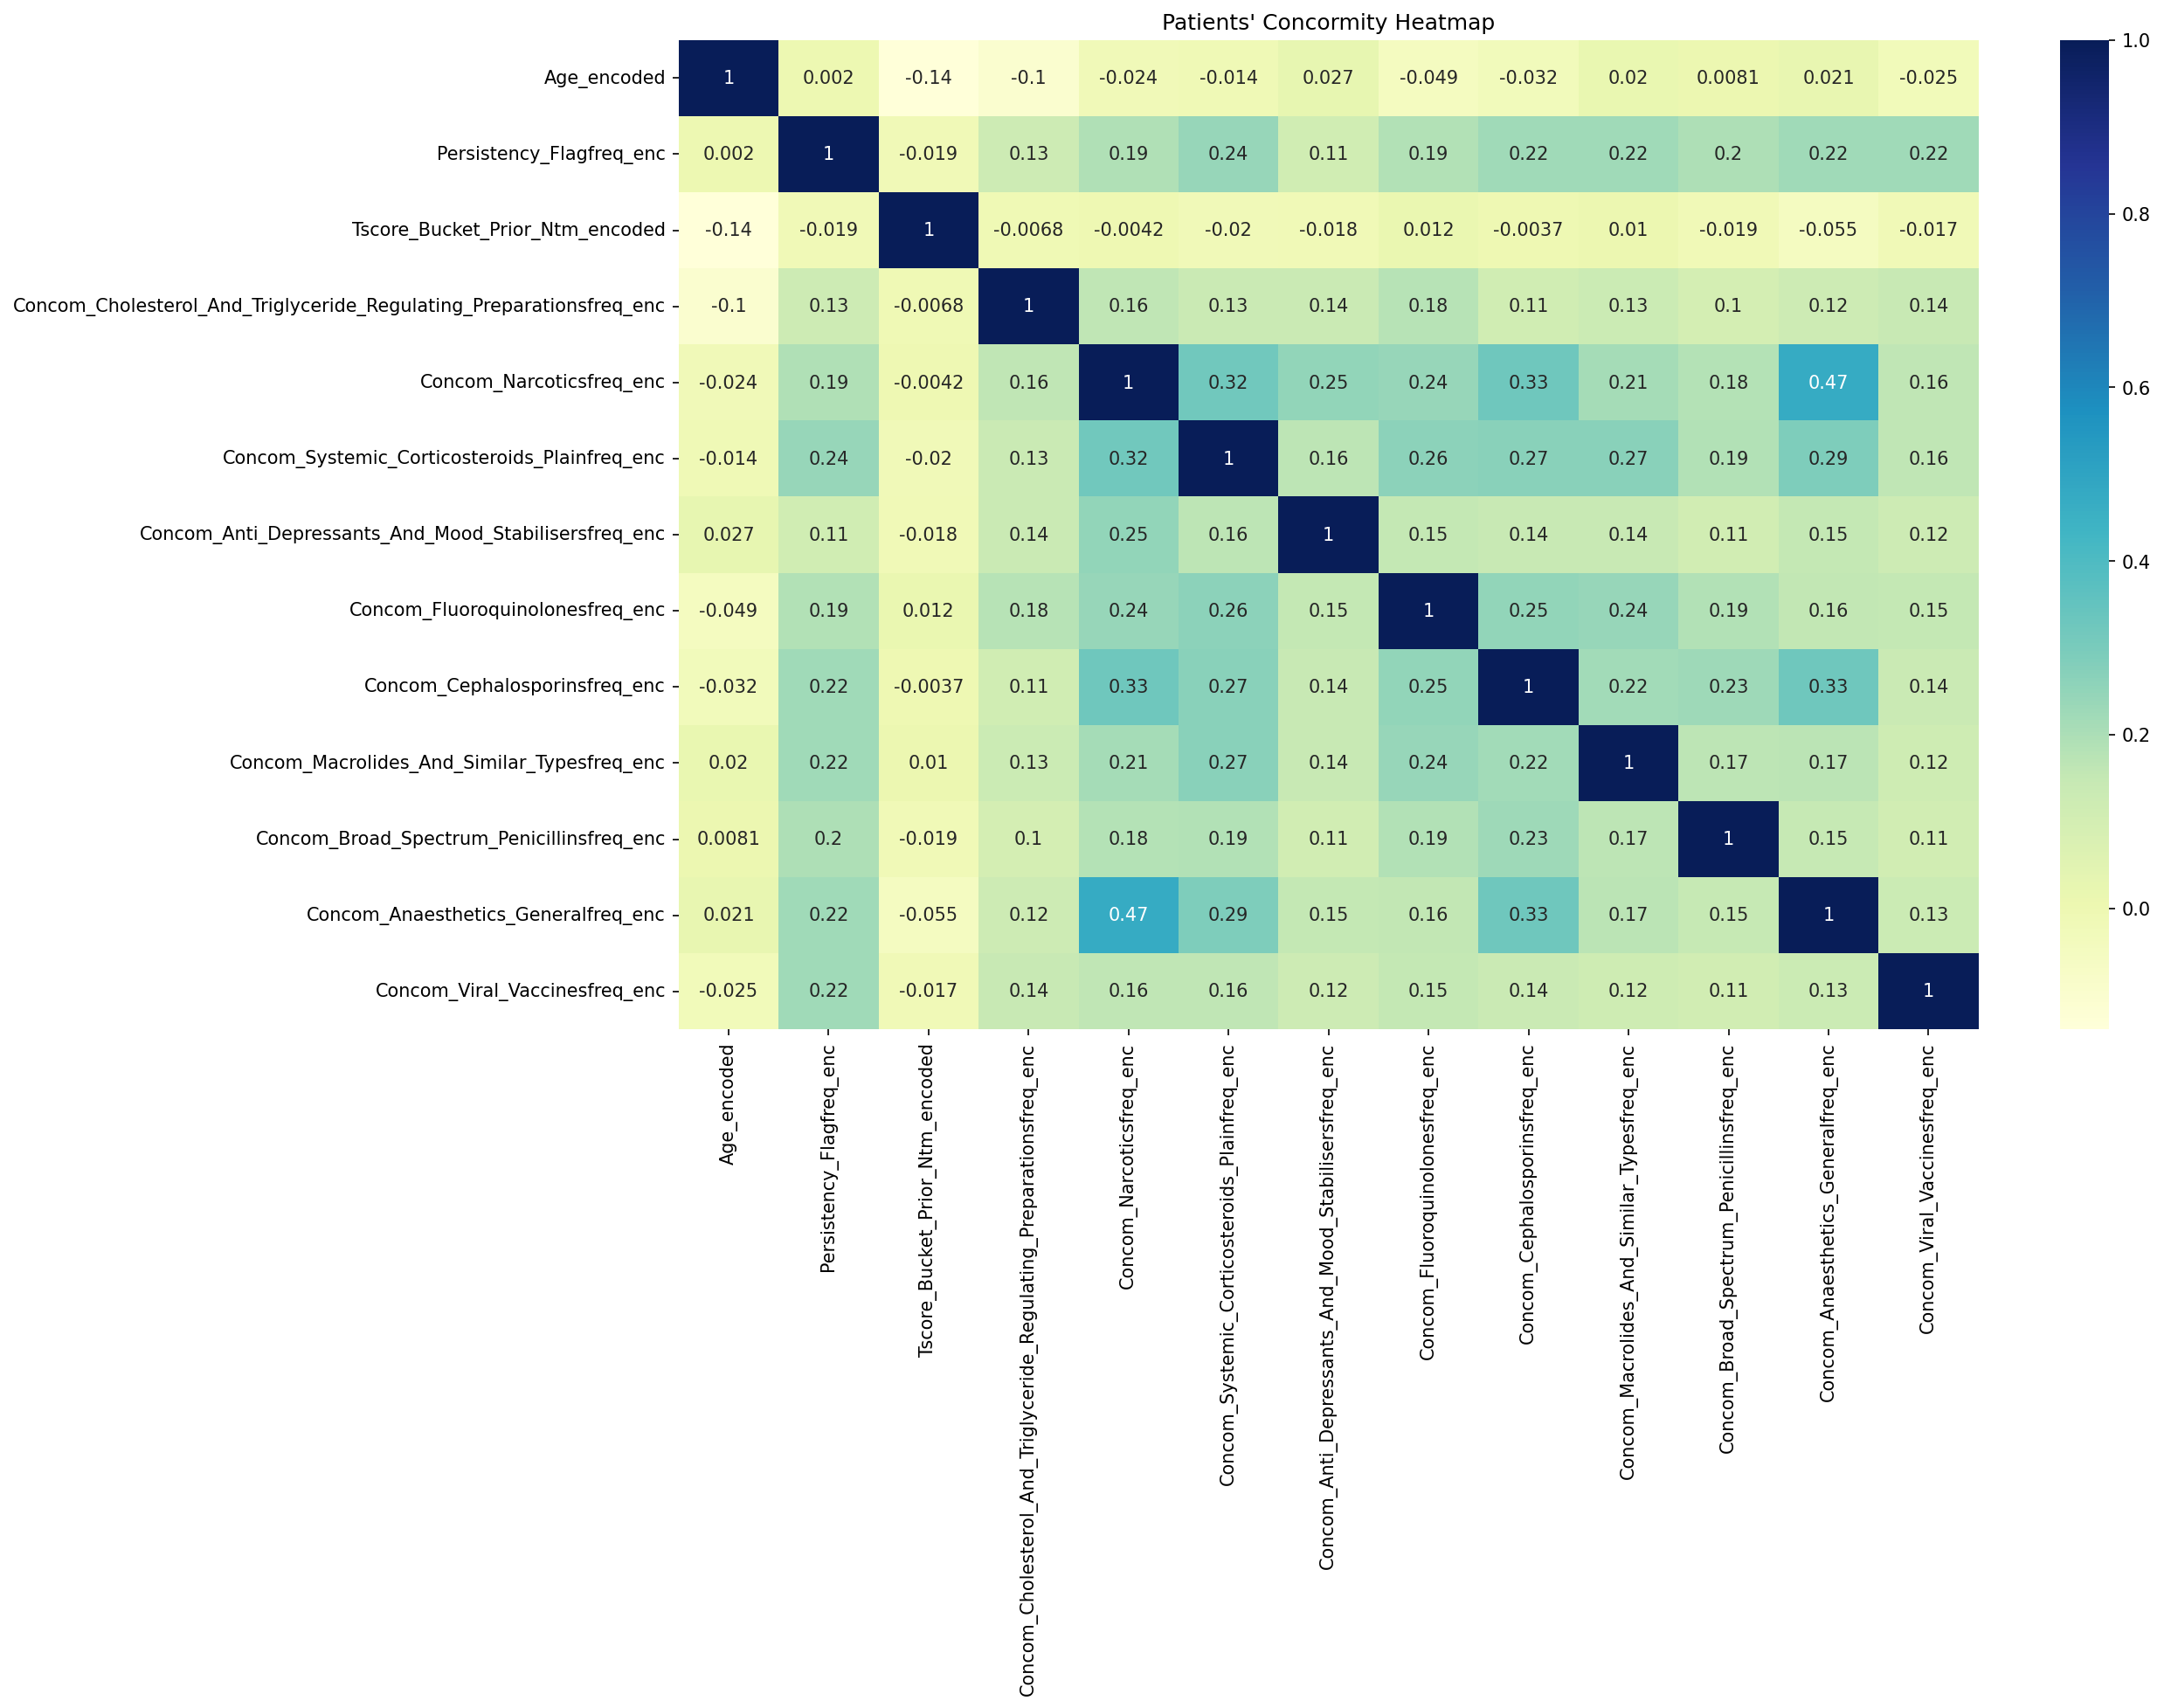

In [43]:
plt.figure(figsize=(16,10),dpi=150)
plt.title("Patients' Concormity Heatmap")
dataplot2 = sns.heatmap(Concorm_df.corr(), cmap="YlGnBu", annot=True)
  

Let's take a look at patients who have Injectectable medication prescribed to them during the prescription.

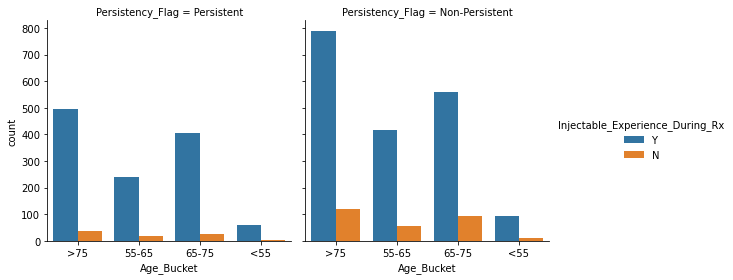

In [44]:
sns.catplot(x="Age_Bucket", hue="Injectable_Experience_During_Rx", col="Persistency_Flag",
                data=df, kind="count",
                height=4, aspect=1);

#### Findings
- A large number of peopke who have injectable medication in their prescription are not persistent with their treatments

### Patient's Risk
In this section, we will investigate what may put patients at different kinds of risks

Does a patient's age, race or t-score affect their risk count?

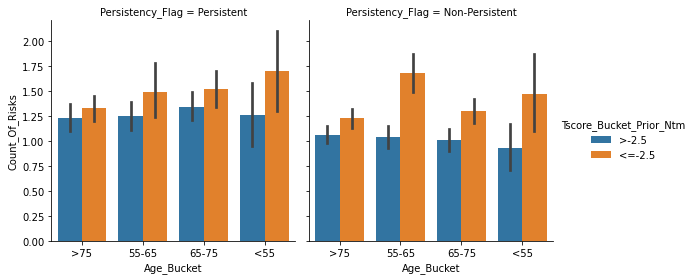

In [45]:
g = sns.catplot(x="Age_Bucket", y="Count_Of_Risks",
                hue="Tscore_Bucket_Prior_Ntm", col="Persistency_Flag",
                data=df, kind="bar",
                height=4, aspect=1);

Factors that could cause a possible change in a patients risk segment

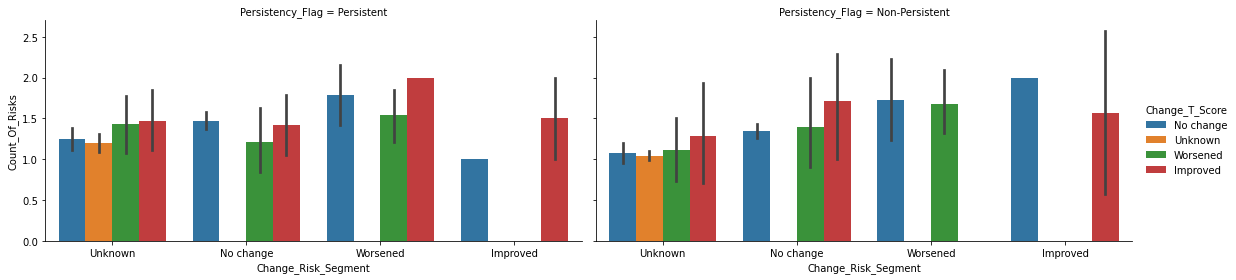

In [46]:
g = sns.catplot(x="Change_Risk_Segment", y="Count_Of_Risks",
                hue="Change_T_Score", col="Persistency_Flag",
                data=df, kind="bar",
                height=4, aspect=2);

In [47]:
# creating a new dataframe with a count of risks column
Risk = df["Count_Of_Risks"]
Risk2 = [Cormobid_df, Risk]
Cormobid_Risk = pd.concat(Risk2, axis=1, join="inner")
Cormobid_Risk.head()

,Age_encoded,Persistency_Flagfreq_enc,Tscore_Bucket_Prior_Ntm_encoded,Comorb_Encounter_For_Screening_For_Malignant_Neoplasmsfreq_enc,Comorb_Encounter_For_Immunizationfreq_enc,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dxfreq_enc",Comorb_Vitamin_D_Deficiencyfreq_enc,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classifiedfreq_enc,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dxfreq_enc,Comorb_Long_Term_Current_Drug_Therapyfreq_enc,Comorb_Dorsalgiafreq_enc,Comorb_Personal_History_Of_Other_Diseases_And_Conditionsfreq_enc,Comorb_Other_Disorders_Of_Bone_Density_And_Structurefreq_enc,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemiasfreq_enc,Comorb_Osteoporosis_without_current_pathological_fracturefreq_enc,Comorb_Personal_history_of_malignant_neoplasmfreq_enc,Comorb_Gastro_esophageal_reflux_diseasefreq_enc,Count_Of_Risks
0,3.0,0.37646,1.0,0.552278,0.441881,0.39486,0.680783,0.708236,0.231016,0.76139,0.227512,0.197722,0.848715,0.484521,0.732185,0.810456,0.816005,0.0
1,0.0,0.62354,1.0,0.552278,0.558119,0.39486,0.680783,0.708236,0.768984,0.76139,0.772488,0.802278,0.848715,0.484521,0.732185,0.810456,0.816005,0.0
2,1.0,0.62354,0.0,0.447722,0.558119,0.39486,0.680783,0.708236,0.768984,0.76139,0.772488,0.802278,0.848715,0.484521,0.732185,0.810456,0.816005,2.0
3,3.0,0.62354,1.0,0.552278,0.441881,0.39486,0.680783,0.291764,0.768984,0.76139,0.227512,0.802278,0.848715,0.515479,0.732185,0.810456,0.183995,1.0
4,3.0,0.62354,0.0,0.447722,0.441881,0.39486,0.680783,0.708236,0.768984,0.76139,0.227512,0.197722,0.848715,0.484521,0.732185,0.810456,0.816005,1.0


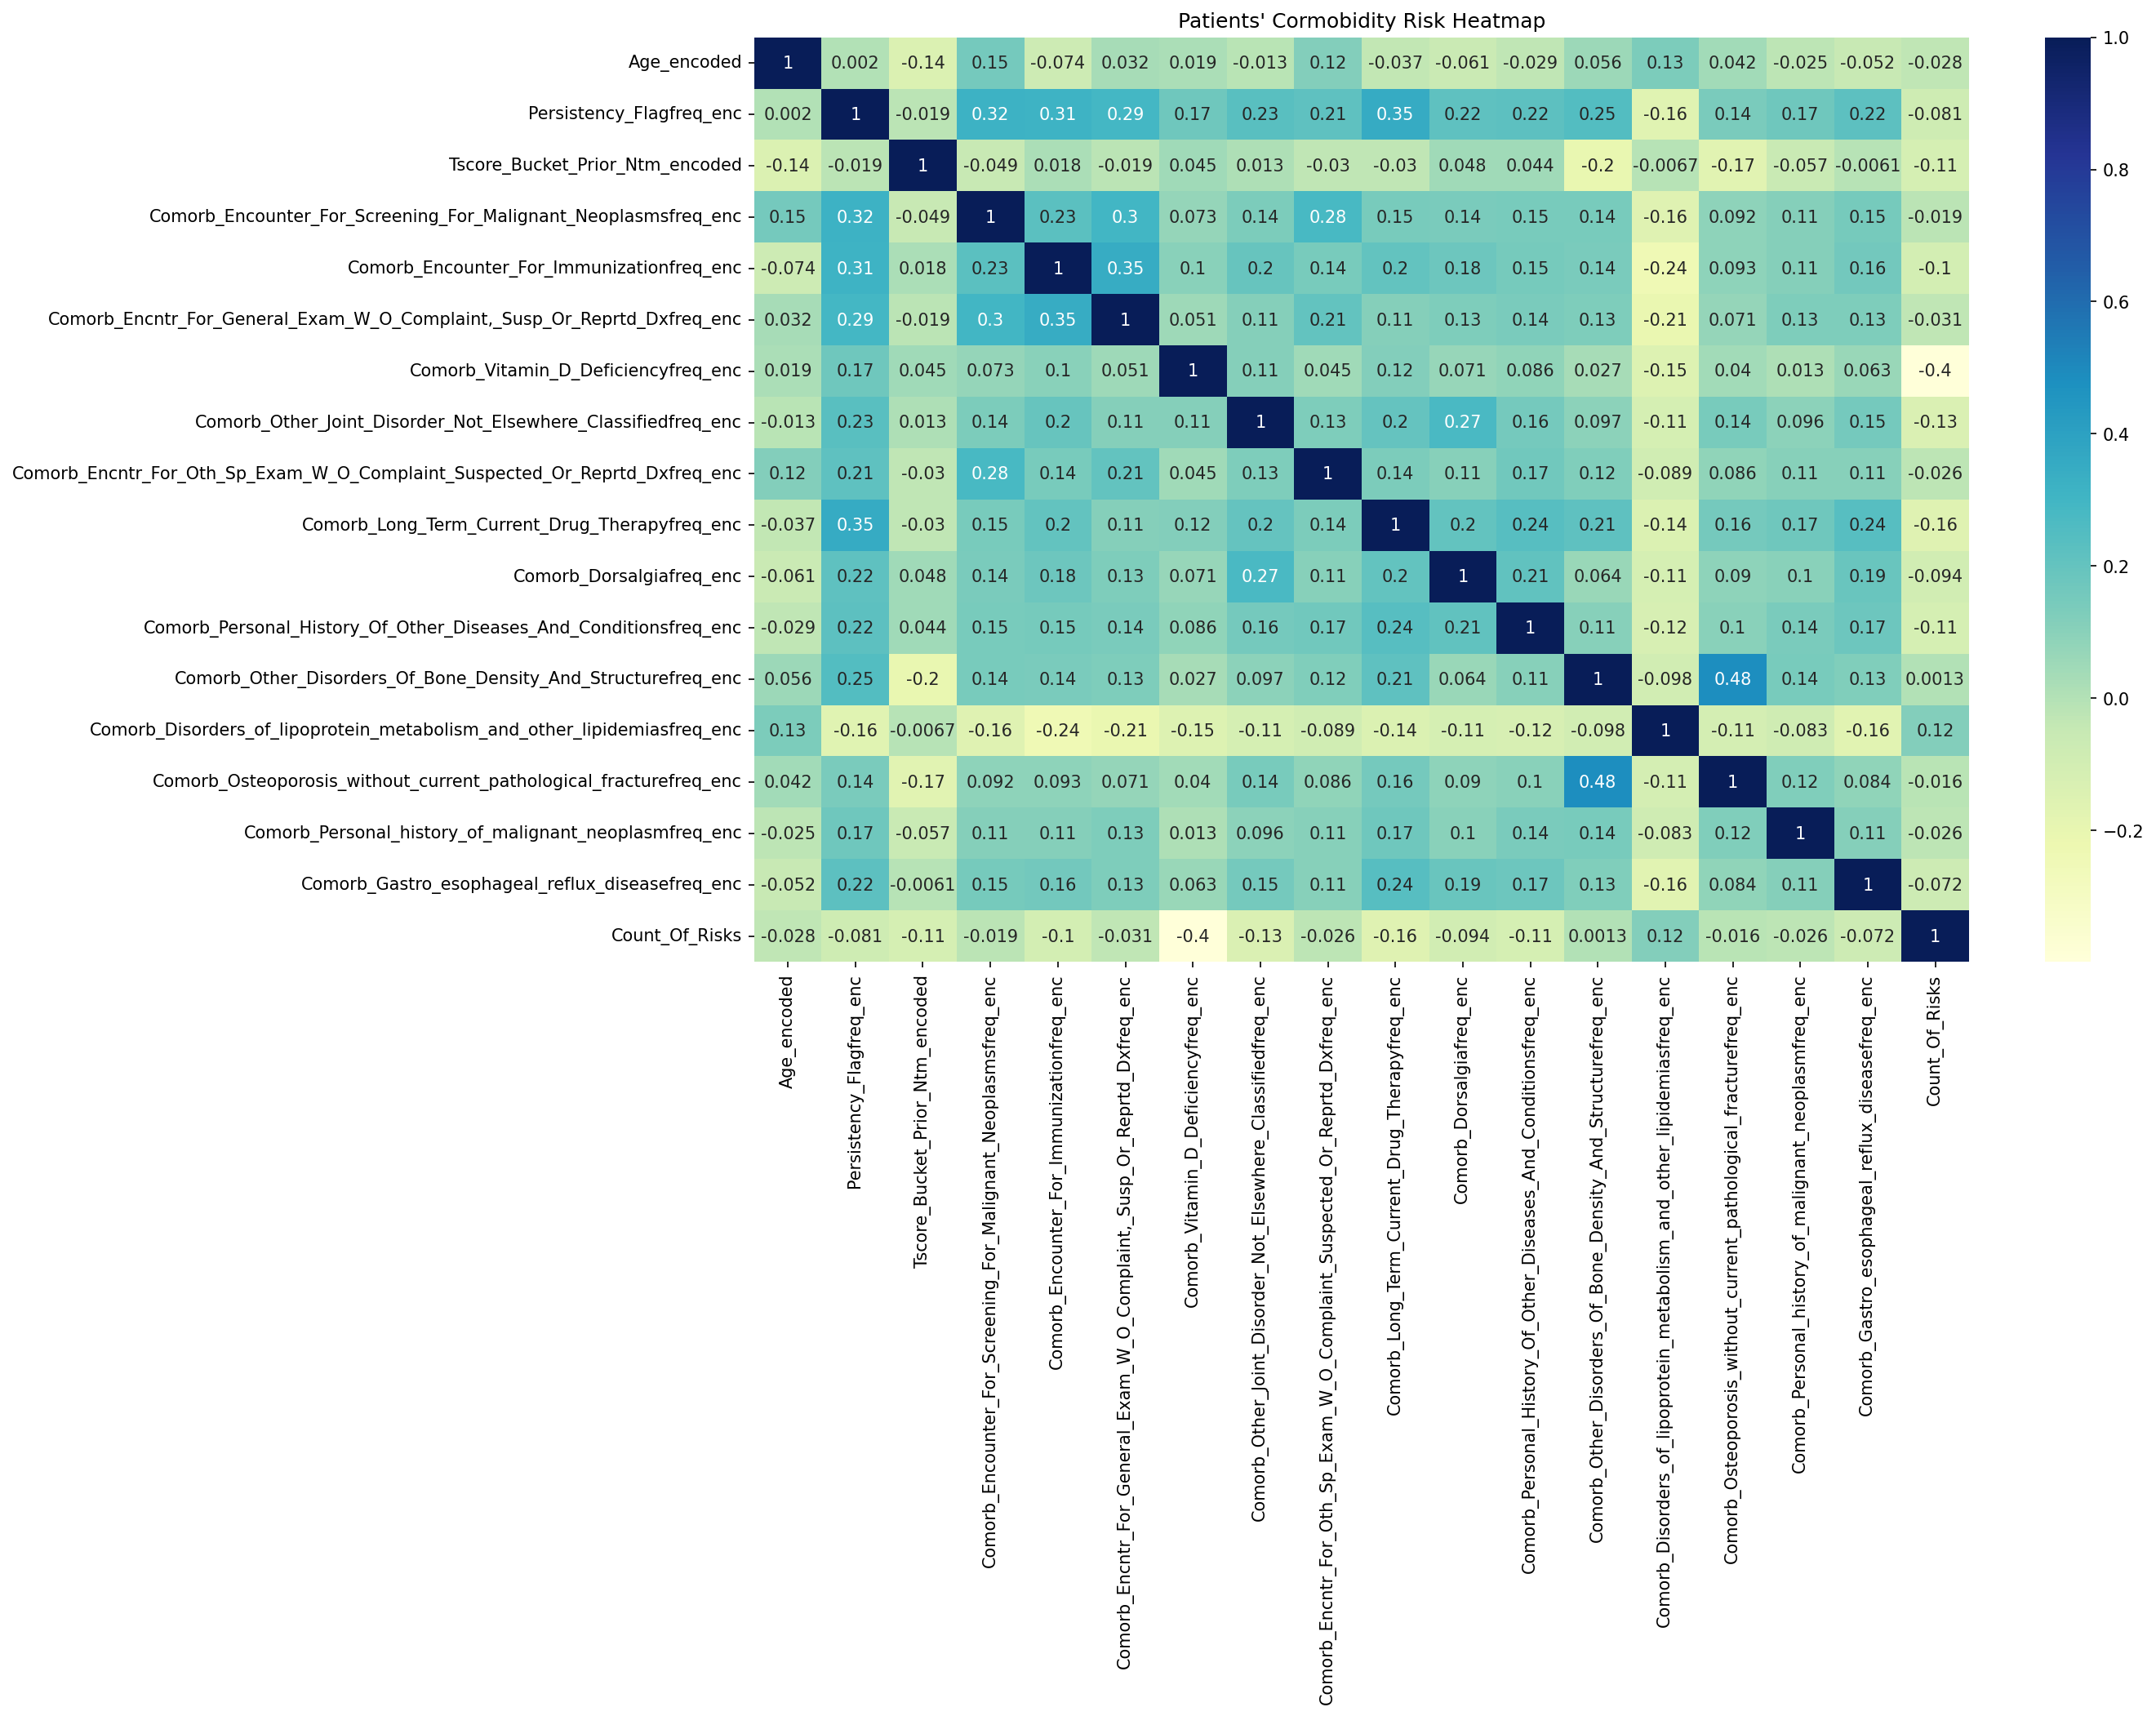

In [48]:
plt.figure(figsize=(16,10),dpi=150)
plt.title("Patients' Cormobidity Risk Heatmap")
dataplot1 = sns.heatmap(Cormobid_Risk.corr(), cmap="YlGnBu", annot=True)
  

In [49]:
Risk3 = [Concorm_df, Risk]
Concorm_Risk = pd.concat(Risk3, axis=1, join="inner")
Concorm_Risk.head()



,Age_encoded,Persistency_Flagfreq_enc,Tscore_Bucket_Prior_Ntm_encoded,Concom_Cholesterol_And_Triglyceride_Regulating_Preparationsfreq_enc,Concom_Narcoticsfreq_enc,Concom_Systemic_Corticosteroids_Plainfreq_enc,Concom_Anti_Depressants_And_Mood_Stabilisersfreq_enc,Concom_Fluoroquinolonesfreq_enc,Concom_Cephalosporinsfreq_enc,Concom_Macrolides_And_Similar_Typesfreq_enc,Concom_Broad_Spectrum_Penicillinsfreq_enc,Concom_Anaesthetics_Generalfreq_enc,Concom_Viral_Vaccinesfreq_enc,Count_Of_Risks
0,3.0,0.37646,1.0,0.65479,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904,0.0
1,0.0,0.62354,1.0,0.65479,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904,0.0
2,1.0,0.62354,0.0,0.34521,0.639895,0.715829,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904,2.0
3,3.0,0.62354,1.0,0.65479,0.360105,0.284171,0.719918,0.81396,0.82389,0.833236,0.871787,0.854848,0.103096,1.0
4,3.0,0.62354,0.0,0.65479,0.360105,0.284171,0.280082,0.81396,0.82389,0.833236,0.871787,0.854848,0.896904,1.0


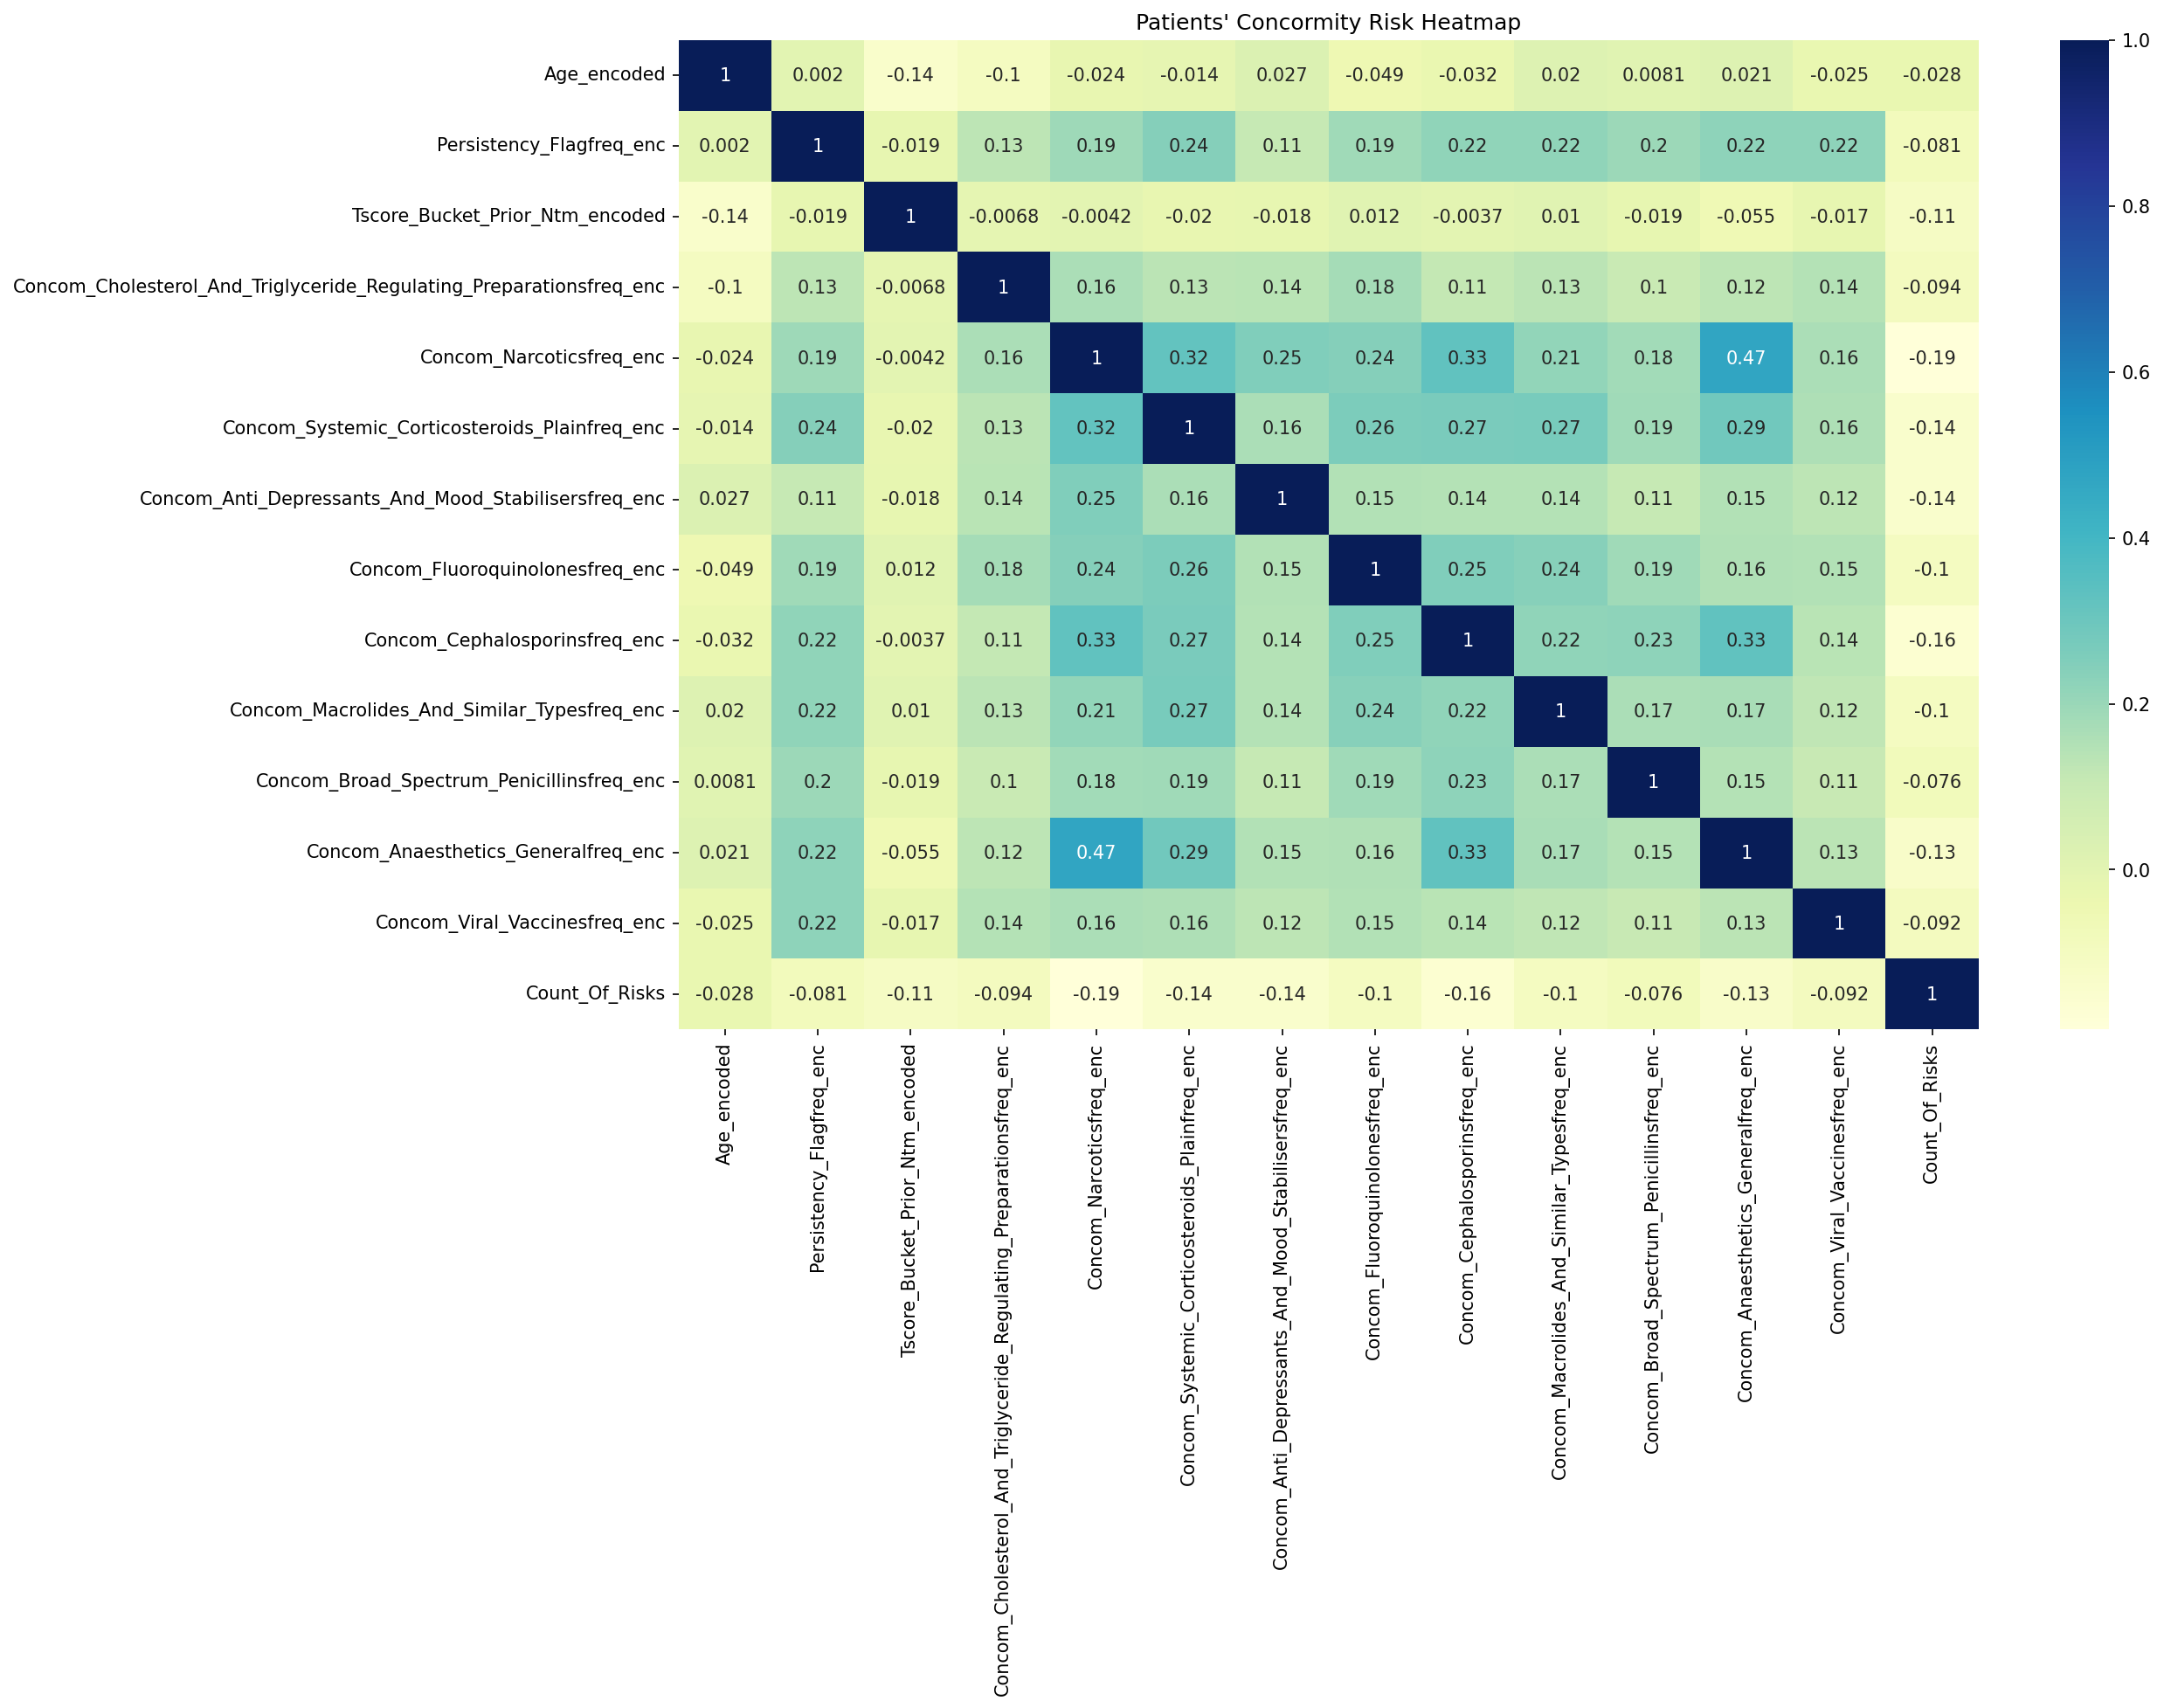

In [50]:
plt.figure(figsize=(16,10),dpi=150)
plt.title("Patients' Concormity Risk Heatmap")
dataplot1 = sns.heatmap(Concorm_Risk.corr(), cmap="YlGnBu", annot=True)
  

### Findings
- Patients with lower Tscores are generally more at risk compared to those with higher Tscores
- Concormity and cormobidity generally have no effect on a patient's risk count


### Recommendations
- Due to the fact that patients who belong to IDNs get more Dexa svans and are able to access a wide range of healthcare services in the same facility, we recommend patients seeking medical care from these facilities.
- Patients should be administered with dexa scans at least once and those with lower Tscores should be closely monitored as they at a high risk of getting fragility fractures. We recommend frequent check-ins with their healthcare provider.
- Patients with injectable medication should be given frequent reminders by their local pharmacists to take their medication as they have a high rate of non-persistency.
- Pharmacists should closely monitor their older patients as the rate of non-persistency is increasing with age. They should set remainders for them or keep in touch with a patient's loved one or care giver to ensure they are taking their medication

## Model Development
The purpose of this entire project was to build a model that will flag future patients as either persitent or non-persistent based on information from their healthcare provider.
We shall build a supervised classification algorithm that'll enable us achieve this.
Logistic regression will be our baseline model.

### Importing Required libraries

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#### Separating our data into features and labels

In [72]:
# Labels
y = df['Persistency_Flag_encoded'] 

In [63]:
# Features
x = df.iloc[:, 68:]
x.drop('Persistency_Flagfreq_enc', axis=1, inplace=True)
x.drop('Count_Of_Risks_Binned', axis = 1, inplace=True)
x.head(5)

,Count_Of_Risks,Dexa_Freq_During_Rx_Log,Age_encoded,Tscore_Bucket_Prior_Ntm_encoded,Tscore_Bucket_During_Rx_encoded,Genderfreq_enc,Racefreq_enc,Ethnicityfreq_enc,Regionfreq_enc,Ntm_Specialityfreq_enc,...,Risk_Chronic_Liver_Diseasefreq_enc,Risk_Family_History_Of_Osteoporosisfreq_enc,Risk_Low_Calcium_Intakefreq_enc,Risk_Vitamin_D_Insufficiencyfreq_enc,Risk_Poor_Health_Frailtyfreq_enc,Risk_Excessive_Thinnessfreq_enc,Risk_Hysterectomy_Oophorectomyfreq_enc,Risk_Estrogen_Deficiencyfreq_enc,Risk_Immobilizationfreq_enc,Risk_Recurring_Fallsfreq_enc
0,0.0,0.0,3.0,1.0,0.0,0.056659,0.919393,0.944801,0.146612,0.448306,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
1,0.0,0.0,0.0,1.0,2.0,0.056659,0.024533,0.944801,0.146612,0.448306,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
2,2.0,0.0,1.0,0.0,0.0,0.943341,0.028329,0.028621,0.403914,0.448306,...,0.994743,0.895444,0.012266,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
3,1.0,0.0,3.0,1.0,0.0,0.943341,0.919393,0.944801,0.403914,0.448306,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848
4,1.0,0.0,3.0,0.0,2.0,0.943341,0.919393,0.944801,0.403914,0.448306,...,0.994743,0.895444,0.987734,0.522196,0.943925,0.980432,0.984229,0.996787,0.995911,0.979848


### Splitting data into training and testing datasets

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### Baseline Model: Logistic Regression
Logistic regression was chosen as our baseline classifier due to its minimal complexity

In [204]:
# scaling our data to make it look more less like a normal distribution
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [205]:
pipe.score(x_test, y_test)# apply scaling on test data

0.88

In [206]:
# Making prediction for the testing data
pipe.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0])

#### Model evaluation: Logistic regression

In [251]:
#use model to predict probability that given y value is 1
y_log_prob = pipe.predict_proba(x_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_log_prob)

#print AUC score
print("ROC_AUC Score: ", auc)

ROC_AUC Score:  0.9807692307692307


In [255]:
pipe_prediction = pipe.predict(x_test)
print("Accuracy score for the logistic regression model: "  ,accuracy_score(pipe_prediction, y_test))
print("Precision score for the logistic regression model: "  ,precision_score(pipe_prediction, y_test))
print("Recall score for the logistic regression model: ", recall_score(pipe_prediction, y_test))
print(confusion_matrix(pipe_prediction, y_test))

Accuracy score for the logistic regression model:  0.88
Precision score for the logistic regression model:  0.8461538461538461
Recall score for the logistic regression model:  0.9166666666666666
[[11  2]
 [ 1 11]]


### k-Nearest Neighbours

In [235]:
# Instantaining our model classifier
KNN_model = KNeighborsClassifier(n_neighbors=15)# we need to specify number of training samples
#required to make a prediction

In [236]:
#Fitting the training dataset
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [237]:
#predicting labels for test data
KNN_model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0])

#### Model evaluation: k-Nearest Neighbours

In [250]:
#use model to predict probability that given y value is 1
y_KNN_prob = KNN_model.predict_proba(x_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_KNN_prob)

#print AUC score
print("ROC_AUC Score: ",auc)


ROC_AUC Score:  0.9807692307692308


In [256]:
KNN_prediction = KNN_model.predict(x_test)
print("Accuracy score for the KNN model: "  ,accuracy_score(KNN_prediction, y_test))
print("Precision score for the KNN model: "  ,precision_score(KNN_prediction, y_test))
print("Recall score for the KNN model: ", recall_score(KNN_prediction, y_test))
print(confusion_matrix(KNN_prediction, y_test))

Accuracy score for the KNN model:  0.88
Precision score for the KNN model:  0.8461538461538461
Recall score for the KNN model:  0.9166666666666666
[[11  2]
 [ 1 11]]


### Ensemble Model
For this model, we will train our data with different classifiers namely: k-Nearest Neighbours, Support vector machines and Naive Bayes. Each classifier will make its own prediction but the label with majority vote is the oe that will be the final prediction. Soft voting will be used, whereby we take the average of the probabilities of each of the label and whichever label is having the highest average will be the final prediction.

In [214]:
KNNClf = KNeighborsClassifier(n_neighbors=5)
svmClf = SVC(probability=True, random_state=0) # probability calculation
nbclf = GaussianNB()

In [215]:
# constructing the ensemble classifier by mentioning the individual classifiers.
ens = VotingClassifier(estimators = [('svm',svmClf), ('KNN', KNNClf), ('nb', nbclf)], voting='soft') 

In [216]:
# train the ensemble classifier
ens.fit(x_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=0)),
                             ('KNN', KNeighborsClassifier()),
                             ('nb', GaussianNB())],
                 voting='soft')

In [217]:
#predicting labels for test data
ens.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0])

#### Model Evaluation: Ensemble Model

In [249]:
#use model to predict probability that given y value is 1
y_ens_prob = ens.predict_proba(x_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_ens_prob)

#print AUC score
print("ROC_AUC Score: ",auc)


ROC_AUC Score:  0.9935897435897436


In [257]:
ens_prediction = ens.predict(x_test)
print("Accuracy score for the Ensemble model: "  ,accuracy_score(ens_prediction, y_test))
print("Precision score for the Ensemble model: "  ,precision_score(ens_prediction, y_test))
print("Recall score for the Ensemble model: ", recall_score(ens_prediction, y_test))
print(confusion_matrix(ens_prediction, y_test))

Accuracy score for the Ensemble model:  0.96
Precision score for the Ensemble model:  0.9230769230769231
Recall score for the Ensemble model:  1.0
[[12  1]
 [ 0 12]]


Our Ensemble Model has a higher AUC score, accuracy, precision score and a better confusion matrix. This is because it overcomes all the weakness beingb experienced by individual models eg.bias, variance and noise.

### Boosting Model
This model converts weak learners to strong learners in sequential iterations.

In [261]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [264]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [265]:
#predicting labels for test data
xgb_clf.predict(x_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0])

#### Model Evaluation: XGB Boost model

In [266]:
#use model to predict probability that given y value is 1
y_xgb_prob = xgb_clf.predict_proba(x_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_xgb_prob)

#print AUC score
print("ROC_AUC Score: ",auc)

ROC_AUC Score:  0.9935897435897436


In [267]:
xgb_prediction = xgb_clf.predict(x_test)
print("Accuracy score for the XGB boost model: "  ,accuracy_score(xgb_prediction, y_test))
print("Precision score for the XGB boost model: "  ,precision_score(xgb_prediction, y_test))
print("Recall score for the XGB boost model: ", recall_score(xgb_prediction, y_test))
print(confusion_matrix(ens_prediction, y_test))

Accuracy score for the XGB boost model:  0.96
Precision score for the XGB boost model:  0.9230769230769231
Recall score for the XGB boost model:  1.0
[[12  1]
 [ 0 12]]


The XGB Boost and Ensemble Models have the same evaluation metrics but they both prove to be better models compared to individual classifier models as they overcome their weakness. One of these two may be the model that fits the demands of this project.